# <span class="pirk">Web Traffic Prediction for Enhanced Ad Revenue</span>

# Final Project Submission

* Group members:

**<span class="girk">Mwenda Mugambi**

**<span class="girk">Frank Kiptoo</span></span>**

**<span class="girk">Yvonne Kamari</span>**

**<span class="girk">Julliet Iswana</span>**

**<span class="girk">Sylvester Magunda</span>**

**<span class="girk">Trevor Mwangi</span>**

# Table of Contents
1. [Business Overview](#1.-Business-Overview)
   

2. [Problem Statement](#2.-Problem-Statement)


3. [Project Objective](#3.-Project-Objective)


4. [Main Objectives](#4.-Main-Objectives)
    
    4.1 [Specific Objectives](#4.1-Specific-Objectives)
    
    
5. [Data Collection & Understanding](#5.-Data-Collection-&-Understanding)

    
6. [Data Features](#5.-Data-Features)


7. [Success Criteria](#7.-Success-Criteria)

    
8. [Data Preprocessing](#8.-Data-Preprocessing)
    
    
9. [Exploratory Data Analysis](#9.-Exploratory-Data-Analysis)

    9.1 [EFFECTS OF PROMOTIONS & OTHER ANNOUNCEMENTS](#9.1-EFFECTS-OF-PROMOTIONS-&-OTHER-ANNOUNCEMENTS)
    
    9.2 [EFFECTS OF COVID-19](#9.2-EFFECTS-OF-COVID-19)
    
    9.3 [EFFECT OF PUBLIC & SCHOOL HOLIDAYS](#9.3-EFFECT-OF-PUBLIC-&-SCHOOL-HOLIDAYS)
    
    9.4 [Effect of seasons over the years](#9.4-Effect-of-seasons-over-the-years)
    
    9.5 [Month-wise and year-wise traffic trends](#9.5-Month-wise-and-year-wise-traffic-trends)
    
    9.6 [Monthly Analysis across the years](#9.6-Monthly-Analysis-across-the-years)
    
    9.7 [Weekly Analysis accross the years](#9.7-Weekly-Analysis-accross-the-years)
    
    9.8 [Days of the week Analysis accross the years](#9.8-Days-of-the-week-Analysis-accross-the-years)
    
    
10. [Correlation Analysis](#10.-Correlation-Analysis)


11. [Time Series Modeling](#11.-Time-Series-Modeling)
    
    11.1 [Data Preprocessing for Modeling](#11.1-Data-Preprocessing-for-Modeling)
    
    11.2 [Removing Trends](#11.2-Removing-Trends)
    
    11.3 [Decomposition](#11.3-Decomposition)
    
    11.4 [Correlation and Autocorrelation](#11.4-Correlation-and-Autocorrelation)


12. [ARIMA Model](#12.-ARIMA-Model)
    
    12.1 [Model 1 (Baseline): ARIMA(1,0) Model](#12.1-Model-1-(Baseline):-ARIMA(1,0)-Model)
    
    12.2 [Model 2: ARIMA(2,1) Model](#12.2-Model-2:-ARIMA(2,1)-Model)
    
    12.3 [Model 3: auto_arima](#12.3-Model-3:-auto_arima)
    
    12.4 [Model 4: SARIMA Model](#12.4-Model-4:-SARIMA-Model)
    
    12.5 [Model 5: Facebook Prophet](#12.5-Model-5:-Facebook-Prophet)


13. [Evaluation](#13.-Evaluation)


14. [Conclusion](#14.-Conclusion)


15. [Deployment](#15.-Deployment)

## 1. Business Overview

[Jambojet](https://www.jambojet.com/en-us/) is a Kenyan low-cost airline that operates in the East African region. It was established in 2014 as a subsidiary of Kenya Airways and has become a dominant force in the aviation industry, setting the standard for budget-friendly and reliable air travel across East Africa.

With an impressive [market share of 54% in domestic air travel](https://www.businessdailyafrica.com/bd/corporate/shipping-logistics/jambojet-puts-its-local-business-share-at-54pc--4383624), Jambojet has successfully solidified its presence as a preferred choice for cost-conscious travellers. The recognition bestowed upon them by [winning the World Travel Awards](https://www.worldtravelawards.com/profile-37202-jambojet) for the title of **Africa's Leading Low-Cost Airline in both 2022 and 2023** underscores their commitment to excellence and customer satisfaction.

In 2018, Jambojet expanded its reach and revenue streams by launching its advertising product. With their website being a leading online platform, Jambojet recognized the potential of optimizing the space to not only maximize revenue but also enhance advertiser satisfaction.

## 2. Problem Statement

Jambojet, strives to optimize its advertising spaces to maximize revenue and advertiser satisfaction. The unpredictable nature of web traffic patterns poses a significant challenge and hindered effective ad placement, leading to missed revenue opportunities and decreased advertiser satisfaction. 

## 3. Project Objective

Our project aims to revolutionize ad placement strategies through advanced Time Series Forecasting. This will position Jambojet as a leader in leveraging data-driven insights for web traffic optimization and align with industry best practices to not only boost the platforms competitiveness but also contribute to the broader industry shift towards efficient and targeted online advertising solutions.

### 4. Main Objectives

- Develop a Time Series Forecasting model for precise web traffic predictions.
- Optimize ad placement strategies based on forecasted traffic patterns.
- Maximize ad revenue by strategically positioning ads during peak engagement periods.

### 4.1 Specific Objectives

- Fine-tune forecasting models using historical data from Google Analytics.
- Implement segmentation analysis for targeted ad placement strategies.
- Provide real-time insights to advertisers through a user-friendly dashboard.

## 5. Data Collection & Understanding

We will employ scraping techniques to extract real-time time series data from Google Analytics, ensuring accuracy and relevance for forecasting models within the context of total and new users per day. The dataset simulates the web traffic behaviors of websites such as [www.jambojet.com](https://www.jambojet.com/en-us/), considering their marketing campaigns, travel restrictions, and other industry factors that may influence web traffic.

The dataset consists of time series data of total users ('Simulated_Users') and new users ('Simulated_New_Users') per day, sourced from Google Analytics. It captures daily fluctuations in user engagement, essential for precise forecasting and ad optimization.

## 6. Data Features

The dataset includes variables such as total users, new users, time stamps, and travel-related indicators. These features enable a granular analysis of daily user patterns, essential for understanding travel-specific behaviours.

## 7. Success Criteria

**Root Mean Squared Error (RMSE)** serves as a robust measure to evaluate the accuracy of our time series forecasting models, specifically focusing on predicting daily total users and new users. The significance of achieving a low RMSE lies in its ability to reflect the precision of our forecasting models.

Achieving a low RMSE aligns with the broader goal of contributing to the sustainable development of Jambojet's online advertising ecosystem. By providing precise forecasts, the project facilitates strategic decision-making, ensuring that resources are efficiently allocated to enhance the user experience and sustain a thriving advertising platform.

## Importing the Required Libraries and Models

In [1]:
# Analysis libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from math import sqrt

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import time

# Warning libraries
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

# Metric libraries
from sklearn.metrics import mean_squared_error

# Modeling libraries
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from sklearn.linear_model import LassoLarsCV

# Deployment
import pickle
import streamlit as st

## 8. Data Preprocessing

In [2]:
df = pd.read_excel("Data\Simulated_Web_traffic.xls")
df

,Day_Index,Simulated_Users,Simulated_New_Users
0,2018-01-01,7111,4159
1,2018-01-02,11451,6840
2,2018-01-03,11889,6940
3,2018-01-04,11027,6171
4,2018-01-05,9767,5348
...,...,...,...
1854,2023-01-29,13268,8389
1855,2023-01-30,17711,10424
1856,2023-01-31,17734,10567
1857,2023-02-01,18907,11195


In [3]:
# Check the range of 'Day_Index'
df['Day_Index'].min(), df['Day_Index'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2023-02-01 00:00:00'))

The dataset comprises 1,859 entries across three columns: 'Day_Index', 'Simulated_Users,' and 'Simulated_New_Users.' 'Day_Index' which represent the total and new simulated users for each day, and the date respectively. 

The scope of the data ranges from January 1, 2018, to February 1, 2023.

In [4]:
# Display summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Day_Index            1858 non-null   datetime64[ns]
 1   Simulated_Users      1859 non-null   int64         
 2   Simulated_New_Users  1859 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 43.7 KB


There is notably one missing value in the 'Day_Index' column, represented by the non-null count of 1858, and no missing values in the numerical columns ('Simulated_Users' and 'Simulated_New_Users'). 

The 'Day_Index' column is of the datetime64 data type, while 'Simulated_Users' and 'Simulated. These are the expected data types, therefore no conversion of the variables is required.

In [5]:
# Display the row with the missing value in 'Day_Index'
df[df['Day_Index'].isnull()]

,Day_Index,Simulated_Users,Simulated_New_Users
1858,NaT,23341472,14964617


In [6]:
# Remove rows with missing values in 'Day_Index'
df = df.dropna(subset=['Day_Index'])

The row at index 1858 is identified as the one with the missing value in the 'Day_Index' column. In this row, the 'Day_Index' is represented as 'NaT' (Not a Time), and both 'Simulated_Users' and 'Simulated_New_Users' are marked as 'NaN' (Not a Number). 

Given the impracticality of accurately filling these missing values, we opt to drop the entire row. This decision is made to ensure data integrity for subsequent analysis and model development.

In [7]:
# Confirm whether there are missing values in the dataframe
print("Are there missing values in the dataframe?",
      df.isnull().values.any())

Are there missing values in the dataframe? False


In [8]:
# Check for duplicates
df[df.duplicated()]

,Day_Index,Simulated_Users,Simulated_New_Users


The dataset does not contain any duplicates, indicating that each entry within the dataset is unique.

In [9]:
# Display summary statistics
df.describe()

,Day_Index,Simulated_Users,Simulated_New_Users
count,1858,1858.000000,1858.000000
mean,2020-07-17 12:00:00,12562.222282,8053.693757
min,2018-01-01 00:00:00,340.000000,248.000000
25%,2019-04-10 06:00:00,9511.750000,5719.250000
50%,2020-07-17 12:00:00,12344.500000,7544.500000
75%,2021-10-24 18:00:00,15208.250000,9550.750000
max,2023-02-01 00:00:00,110612.000000,117086.000000
std,NaN,6390.231945,5469.044221


The summary statistics for Jambojet's website traffic provide insights for both 'Simulated_Users' (total users) and 'Simulated_New_Users' (new users). In terms of total users, the average daily count stands at approximately 12,562, showcasing significant variability with a standard deviation of 6,390. The daily total user range spans from a minimum of 340 to a maximum of 110,612, illustrating a broad spectrum of user interactions and engagement levels.

Turning attention to new users, the average daily count registers around 8,054, underscoring variability in daily counts with a standard deviation of 5,469. The daily new user range extends from a minimum of 248 to a maximum of 117,086, highlighting the dynamic and fluctuating nature of new user acquisition. 

## 9. Exploratory Data Analysis

In [10]:
# Calculate the total 'Simulated_Users' and 'Simulated_New_Users'
total_users = df['Simulated_Users'].sum()
total_new_users = df['Simulated_New_Users'].sum()

# Print the results
print(f"Total 'Simulated_Users' to Jambojet's website: {total_users}")
print(f"Total 'Simulated_New_Users' to Jambojet's website: {total_new_users}")

Total 'Simulated_Users' to Jambojet's website: 23340609
Total 'Simulated_New_Users' to Jambojet's website: 14963763


Over the period from January 1, 2018, to February 1, 2023, the simulated web traffic to Jambojet's website totaled approximately 23,340,609 users. Additionally, during the same period, there were approximately 14,963,763 new users simulated to have visited the website.

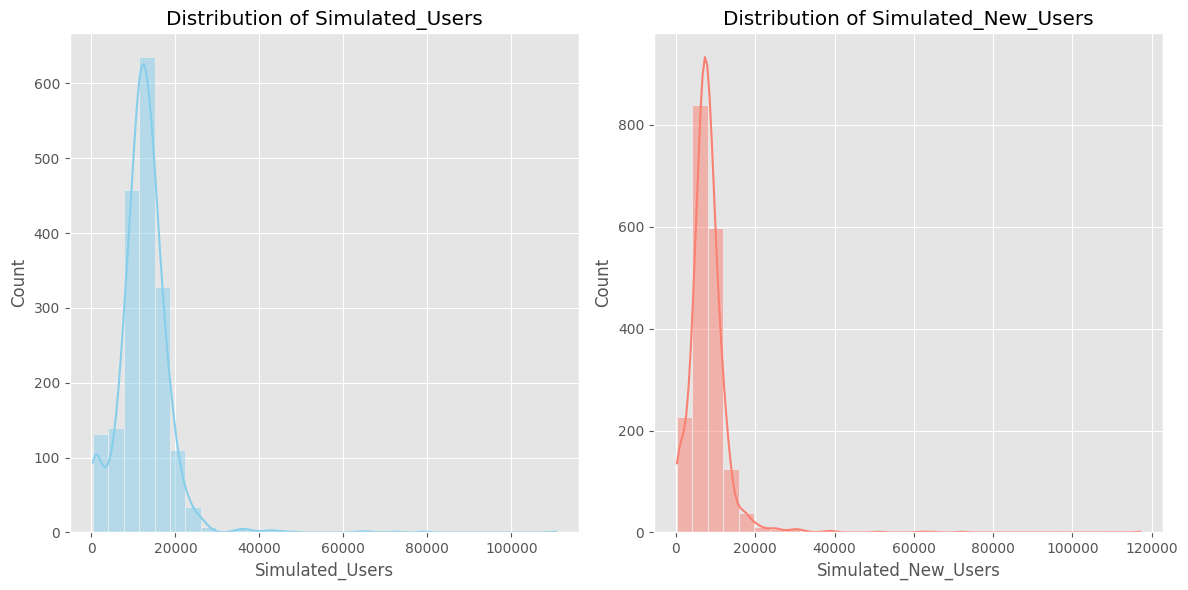

In [11]:
# Distribution of Simulated_Users and Simulated_New_Users
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Simulated_Users'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Simulated_Users')

plt.subplot(1, 2, 2)
sns.histplot(df['Simulated_New_Users'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Simulated_New_Users')

plt.tight_layout()
plt.show()

The 'Simulated_Users' and 'Simulated_New_Users' distributions display a positive skew. 

The simulated traffic analysis for Jambojet's website reveals a daily range of typical engagement, with total users fluctuating between 340 and 22,000 and new users varying from 248 to 20,000. A closer examination of the distribution brings attention to peak periods, showing that the highest daily total user traffic is concentrated between 14,000 and 18,000 users. In parallel, the peak influx of new users is observed within the range of 4,000 to 8,000 per day.

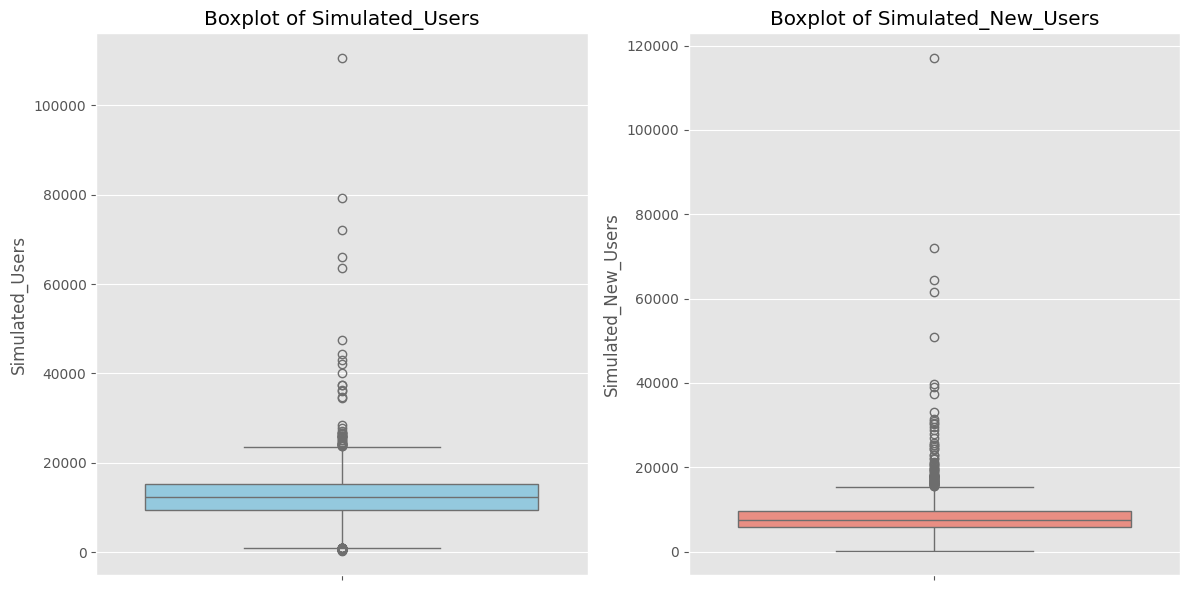

In [12]:
# Box plots for Simulated_Users and Simulated_New_Users
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Simulated_Users', data=df, color='skyblue')
plt.title('Boxplot of Simulated_Users')

plt.subplot(1, 2, 2)
sns.boxplot(y='Simulated_New_Users', data=df, color='salmon')
plt.title('Boxplot of Simulated_New_Users')

plt.tight_layout()
plt.show()

The maximum value for 'Simulated_Users' reaching 110,612 is strikingly higher than the third quartile (Q3) of 15,208.25. This substantial difference strongly indicates the potential presence of outliers, particularly on the higher end of the distribution. Data points beyond the upper whisker of the boxplot for 'Simulated_Users' may be considered outliers, pointing to unusually high daily user counts.

Similarly, 'Simulated_New_Users' presents a maximum value of 117,086, which significantly surpasses the third quartile (Q3) of 9,550.75. This divergence between the maximum value and Q3 strongly suggests potential outliers on the higher end for new user counts. Data points beyond the upper whisker of the boxplot for 'Simulated_New_Users' may be indicative of unusually high daily values for new user acquisition.

Identification of these outliers, particularly on the higher end, raises concerns about the potential skewing of the distribution and subsequent impacts on our overall analysis. Furter investigation into the nature of these outliers and implementation of outlier-handling techniques is therefore crucial in ensuring the accuracy of our time series forecasts.

### 9.1 EFFECTS OF PROMOTIONS & OTHER ANNOUNCEMENTS

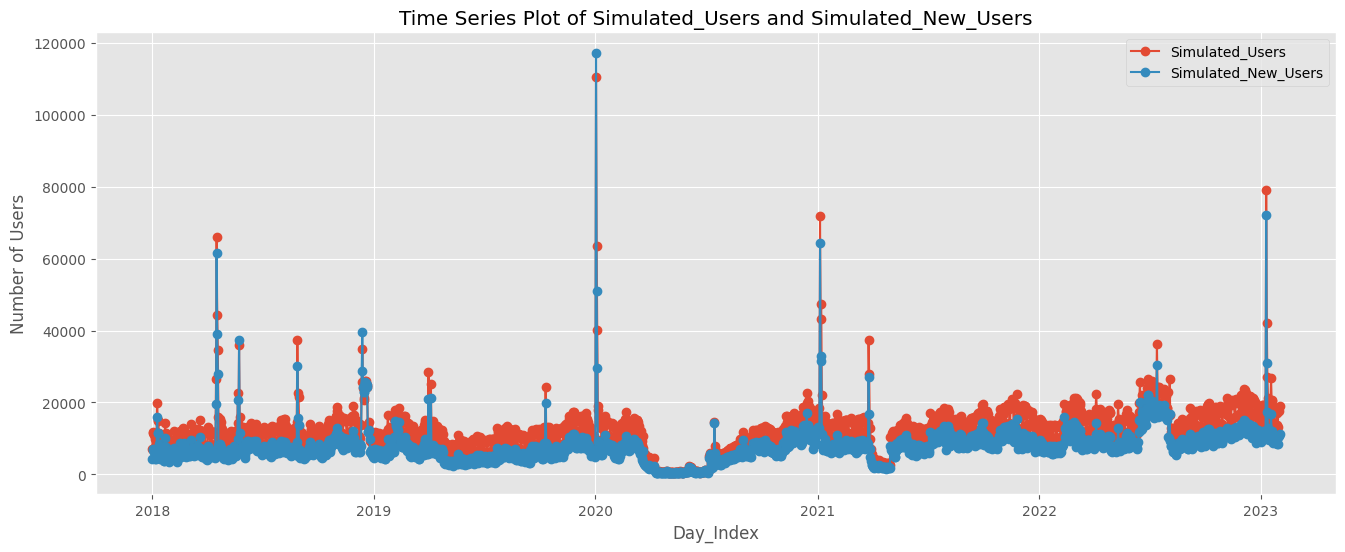

In [13]:
# Time series plot for Simulated_Users and Simulated_New_Users
plt.figure(figsize=(16, 6))
plt.plot(df['Day_Index'], df['Simulated_Users'], label='Simulated_Users', marker='o', linestyle='-')
plt.plot(df['Day_Index'], df['Simulated_New_Users'], label='Simulated_New_Users', marker='o', linestyle='-')
plt.title('Time Series Plot of Simulated_Users and Simulated_New_Users')
plt.xlabel('Day_Index')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

Looking at the time series plot for Jambojet's web traffic, further research indicates that promotional announcements have consistently resulted in significant spikes in web traffic, showcasing the impact of these marketing efforts on user engagement:

- On 16th April, 2018 Jambojet introduced a [72-hour special fare for 10,000 seats](https://www.financialfortunemedia.com/jambojet-slashes-fares-sh2200-new-move/), offering clients unprecedented one-way rates as low as KES 2,200 for domestic destinations and KES 7,330 to Entebbe, Uganda. This led to substantial spikes in web traffic, reaching the highest recorded values of 66,010 'Simulated_Users' and 61,576 'Simulated_New_Users' on 17th April 2018, 44,308 'Simulated_Users' and 39,061 'Simulated_New_Users' on 18th April 2018, and 34,532 'Simulated_Users' and 27,982 'Simulated_New_Users' on 19th April 2018.

- A [35% discount promotion on tickets](https://www.jambojet.com/en-glo/about-jambojet/press-room/jambojet-hits-25-million-passengers-milestone/), announced on 27th August 2018, correlated with a spike in traffic on Jambojet's website on the day the 72-hour promotion began (28th August, 2018). 'Simulated_Users' totaled 37,441, and 'Simulated_New_Users' reached 30,246.

- In February 2019, the airline marked the one-year anniversary of its route to Entebbe, Uganda, by introducing a special promotion offering a [25% discount on one-way tickets](https://www.jambojet.com/en-us/jambojet-one-year-anniversary-in-uganda/) for bookings during the month. This led to a notable increase in user activity on the website throughout the month, with 'Simulated_Users' fluctuating between 10,487 and 18,553 from the 4th to the 28th of February 2019. Similarly, 'Simulated_New_Users' showed a range of 6,603 to 14,798 during this period, reflecting the positive impact of the promotional offer on user engagement.

- To celebrate its fifth-year anniversary, on 1st April, 2019 Jambojet announced the [sale of 100 one-way tickets for KES 50 each](https://www.capitalfm.co.ke/business/2019/04/jambojet-extends-sh50-ticket-offer-for-domestic-destinations/), extending the offer to an additional day on 5th April 2019. This resulted in increased traffic, with 28,390 total users and 21,052 new users on 1st April 2019 and 25,066 total users and 21,193 new users on 5th April 2019.

- On 25th November 2019, the airline initiated its flights to Kigali, Rwanda, resulting in a substantial surge in website traffic. On that specific day, 'Simulated_Users' experienced a notable increase, reaching 17,386, while 'Simulated_New_Users' rose to 11,255. This heightened level of activity persisted for the following three days, with 'Simulated_Users' maintaining a range of 16,812 to 15,791 and 'Simulated_New_Users' fluctuating between 9,166 and 11,271.

- As part of the airline's 2020 New Year Celebrations, the announcement of [selling 10,000 tickets at Kes 2,020 from 2nd - 4th January 2020](https://nation.africa/kenya/business/jambojet-sells-tickets-for-sh2-020-237328) marked the highest-ever spike in website traffic. On 2nd January 2020, 'Simulated_Users' and 'Simulated_New_Users' reached 110,612 and 117,086, respectively. The heightened engagement continued on 3rd and 4th January 2020.

- On 5th January, 2021 a [72-hour sale offering 10,000 seats at a discounted rate of Kes 2,100](https://www.capitalfm.co.ke/business/2021/01/jambojet-offering-passengers-10000-seats-at-sh2100/) for domestic flights to celebrate the new year  sparked a surge in web traffic. The campaign, running from 5th to 7th January 2021, successfully attracted a substantial number of visitors to the airline's website. On 5th January, 'Simulated_Users' peaked at 71,993, accompanied by 64,307 'Simulated_New_Users'. The momentum continued on 6th January with 43,090 'Simulated_Users' and 31,560 'Simulated_New_Users,' and on 7th January, the site recorded 47,408 'Simulated_Users' and 32,995 'Simulated_New_Users.'

- [In collaboration with Cellulant, Jambojet unveiled a promotional campaign](https://www.jambojet.com/en-us/plan-your-trip/nowtravelready-discount-vouchers/), offering 50 vouchers at Kes 1,000 each day from November 16, 2021, to December 23, 2021. This initiative triggered a surge in 'Simulated_Users' on November 15, soaring to 18,636 from 14,003 the day before. Similarly, 'New_Simulated_Users' experienced an increase, reaching 12,229 from 10,286 on the previous day. Throughout the promotional period, the website consistently attracted traffic, with 'Simulated_Users' fluctuating between 12,250 and 22,460, and 'New_Simulated_Users' ranging from 6,981 to 15,273. 

- To celebrate flying over 1 million passengers in 2022, Jambojet announced the [sale of 1,000 tickets at Kes 1,000 for one-way domestic flights](https://www.businessdailyafrica.com/bd/corporate/companies/jambojet-woos-travellers-with-sh1-000-fare-in--4082138). This 24-hour promotion, starting on 10th January 2023, led to spikes in visitors, with 'Simulated_Users' and 'Simulated_New_Users' reaching 79,199 and 72,045 on 10th January and 42,155 and 31,058 on 11th January.

- On June 14, 2022, Jambojet unveiled a new collaboration with Cellulant, this time [introducing an incentive program to reward over 600 frequent fliers](https://www.jambojet.com/en-us/about-jambojet/press-room/jambojet-cellulant-partner-to-award-over-600-frequent-fliers-with-over-2m-in-rewards/) with discount vouchers valued at Kes 3,000 each. These vouchers were exclusively available to customers enrolled in the Jambojet Rewards loyalty program. The announcement appeared to have sparked an increase in 'Simulated_Users,' surging to 17,318 from the previous day's 15,363, while 'New_Simulated_Users' rose to 11,713 from 9,083. From the announcement date until August 8, 2022, 'Simulated_Users' exhibited fluctuations within the range of 11,916 to 36,245, and 'New_Simulated_Users' fluctuated between 7,874 and 30,434. However it is worth noting that this increased web traffic can more likely be attributed to the gradual recovery of Kenya's tourism sector post-COVID.

These examples highlight a consistent pattern where promotional events, offering special fares or discounts, correlate with substantial increases in web traffic. 

### 9.2 EFFECTS OF COVID-19

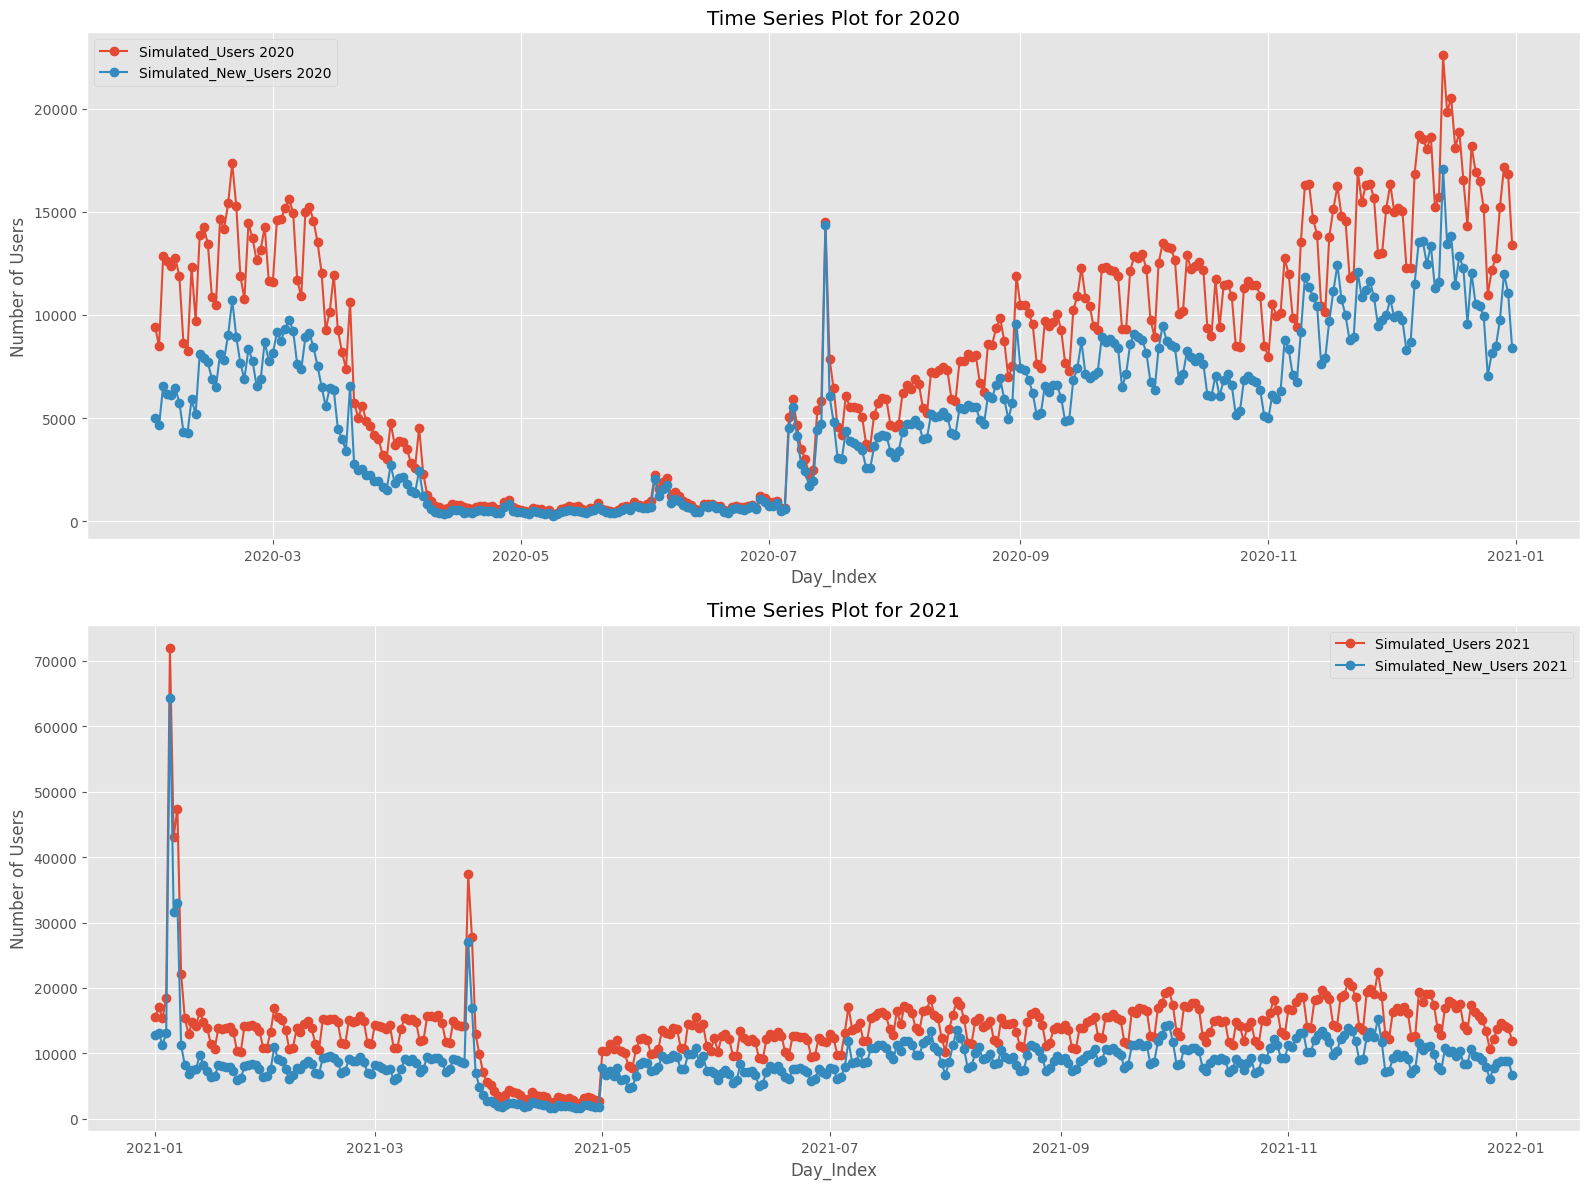

In [14]:
# Filter data for the desired date range for each year
start_date_2020 = '2020-02-01'
end_date_2020 = '2020-12-31'
start_date_2021 = '2021-01-01'
end_date_2021 = '2021-12-31'

filtered_df_2020 = df[(df['Day_Index'] >= start_date_2020) & (df['Day_Index'] <= end_date_2020)]
filtered_df_2021 = df[(df['Day_Index'] >= start_date_2021) & (df['Day_Index'] <= end_date_2021)]

# Create subplots for each year
fig, axs = plt.subplots(2, 1, figsize=(16, 12))

# Plot for 2020
axs[0].plot(filtered_df_2020['Day_Index'], filtered_df_2020['Simulated_Users'], label='Simulated_Users 2020', marker='o', linestyle='-')
axs[0].plot(filtered_df_2020['Day_Index'], filtered_df_2020['Simulated_New_Users'], label='Simulated_New_Users 2020', marker='o', linestyle='-')
axs[0].set_title('Time Series Plot for 2020')
axs[0].set_xlabel('Day_Index')
axs[0].set_ylabel('Number of Users')
axs[0].legend()

# Plot for 2021
axs[1].plot(filtered_df_2021['Day_Index'], filtered_df_2021['Simulated_Users'], label='Simulated_Users 2021', marker='o', linestyle='-')
axs[1].plot(filtered_df_2021['Day_Index'], filtered_df_2021['Simulated_New_Users'], label='Simulated_New_Users 2021', marker='o', linestyle='-')
axs[1].set_title('Time Series Plot for 2021')
axs[1].set_xlabel('Day_Index')
axs[1].set_ylabel('Number of Users')
axs[1].legend()

plt.tight_layout()
plt.show()


The impact of these restrictions on Jambojet was profound, as travel bans, flight restrictions, and the general decline in economic activities contributed to a decrease in web traffic and a subsequent decline in flights and operations.
- In March 2020, the onset of the COVID-19 pandemic in Kenya prompted significant measures to curb the spread of the virus. On 15th March 2020, President Uhuru Kenyatta, along with Cabinet Secretary for Health Mutahi Kagwe, announced a series of restrictions. [Travel from countries with confirmed COVID-19 cases was restricted](https://www.aljazeera.com/news/2020/3/15/kenya-blocks-entry-for-non-residents-in-virus-response), only allowing entry to Kenyan citizens and foreigners with valid residence permits subject to self-quarantine or government-designated facilities. Schools and higher learning institutions were closed, remote work was encouraged, and essential services continued. Cashless transactions were promoted, and various gatherings were restricted, including weddings, malls, nightclubs, churches, and hospital visits. Cargo vessels, aircraft, or ships were permitted, subject to disinfection and crew quarantine.

- By late March 2020, confirmed cases in Kenya increased, leading to the ban of all social gatherings, including religious gatherings. Additionally, a [suspension on international flights imposed](https://www.africanews.com/2020/03/23/kenya-suspends-all-international-flights-as-covid-19-cases-double//) effective from 25th March, causing a dampening effect on tourism. As the month progressed, cases continued to rise, and the first COVID-19-related death was reported on 26th March.

- Before the announcements on 15th March 2020, Jambojet's website experienced relatively stable user numbers, with 'Simulated_Users' fluctuating between 9,257 and 15,635, and 'New_Simulated_Users' ranging from 5,575 to 9,776. However, as the COVID-19 measures took effect post-announcement, there was a notable decline in website visitors. 'Simulated_Users' dropped from 11,961 on 16th March 2020 to a low of 2,995 towards the end of the month. Similarly, 'New_Simulated_Users' decreased from a high of 6,538 following the March 15th announcement to lows of 1,516 towards the end of the month.

- In April 2020, restrictions intensified as President Kenyatta announced a [cessation of movement in and out of Nairobi, Mombasa, Kilifi, and Kwale counties](https://www.aljazeera.com/news/2020/4/6/covid-19-kenya-bans-travel-in-and-out-of-nairobi-other-areas#:~:text=Besides%20the%20capital%2C%20the%20measure,and%20Kilifi%20and%20Kwale%20counties.&text=Kenyan%20President%20Uhuru%20Kenyatta%20has,the%20usually%20busy%20Easter%20weekend.) from 8th April. This marked a 21-day containment period. The number of COVID-19 cases continued to rise, prompting additional measures, including an [extension of the curfew hours](https://nation.africa/kenya/news/covid-19-night-curfew-times-changed-to-9pm-4am-522814). The movement cessation in major counties and curfew persisted as the president announced their extension for a further 30 days on 6th June 2016.

- Between the 1st and 7th of April 2020, daily 'Simulated_Users' exhibited fluctuations, reaching peaks of 4,529 users and troughs of 2,303, while 'New_Simulated_Users' ranged from 2,439 to 1,222. However, following the announcement of movement restrictions on the 8th of April 2020, the number of users continued to fluctuate, but there was a notable decline in 'Simulated_Users' on Jambojet's website. The figures plummeted from 1,271 to a minimum of 561 users per day in the latter part of the month. Similarly, 'New_Simulated_Users' experienced a decrease from 812 to a low of 322 users per day.

- May recorded the lowest user traffic, with neither 'Simulated_Users' nor 'New_Simulated_Users' surpassing 1,000. 'Simulated_Users' fluctuated between highs of 914 and lows of 340, marking the lowest daily user count for the entire data period. Similarly, 'New_Simulated_Users' ranged from highs of 723 to lows of 248, also representing the lowest daily user count observed in our data. 

- June continued to experience low traffic to Jambojet's website, consistently remaining below 1,000 daily users. However, there were brief periods of improvement, particularly as Kenyans anticipated the potential lifting of curfews and travel restrictions. Between the 3rd and 9th of June 2020, there was a minimal spike in traffic, with 'Simulated_Users' fluctuating from 2,232 to 1,198 and 'New_Simulated_Users' ranging from 2,053 to 896. A similar pattern occurred on the 29th and 30th of June, where 'Simulated_Users' reached 1,193 and 1,135 users, and 'New_Simulated_Users' hit 1,085 and 934 users, respectively.

- On July 6, 2020 [President Uhuru Kenyatta announced a substantial easing of COVID-19 restrictions in Kenya](https://nation.africa/kenya/news/uhuru-lifts-cessation-order-for-nairobi-mombasa-and-mandera-1445728). The cessation of movement into and out of Nairobi Metropolitan Area, Mombasa County, and Mandera County was lifted, providing significant relief for the affected regions. Additionally, local air travel was scheduled to resume from July 15 under the guidelines set by the Ministry of Health and Transport. In line with this, [Jambojet announced the resumption of its operations to 5 local destinations](https://www.jambojet.com/en-us/covid-19-updates/jambojet-to-resume-operations-to-local-destinations/). Moreover, [international flights were set to resume from August 1](https://www.the-star.co.ke/news/2020-07-06-kenya-to-resume-international-flights-from-august-1/). This easing of restrictions, particularly the resumption of air travel, presented a positive outlook for Jambojet as web traffic began to steadily increase to expected levels.

- Following the announcement on July 6, there was a remarkable upswing in traffic to Jambojet's website. 'Simulated_Users' increased substantially, rising from a range of 656 to 996 users between July 1st and 5th, 2020, to an impressive 5,050 users on July 6th, 2020. Similarly, 'New_Simulated_Users' witnessed a significant improvement, elevating from a range of 496 to 888 users from July 1st to 5th, 2020, to 4,514 users on July 6th, 2020.

- The positive trend in user traffic continued, with another notable spike following the announcement on July 15th 2020 regarding the resumption of local air travel. Consequently, 'Simulated_Users' surged to 14,518, and 'New_Simulated_Users' reached 14,382. In the subsequent days and months, web traffic demonstrated sustained improvement, with no dips below 3,500 daily users and achieving a highs of up to 22,598 'Simulated_Users' and 17,105 'New_Simulated_Users'.

- The impact of COVID-19 was again felt by the airline on 26th March 2021, following President Uhuru Kenyatta's directive to cease movement between major counties as a measure to curb the spread of the virus, [Jambojet declared the temporary suspension of operations from 29th March 2021 until further notice](https://www.jambojet.com/en-us/covid-19-updates/jambojet-operations-update-following-presidential-executive-order-on-covid-19/). This announcement triggered a notable spike in visits to the airline's website, as individuals sought to make travel arrangements before the implementation of the movement restrictions. On 26th March, the site experienced a surge with 37,380 'Simulated_Users' and 26,967 'Simulated_New_Users,' and on 27th March, 27,812 'Simulated_Users' and 16,875 'Simulated_New_Users' visited the site. However, this uptick was followed by a subsequent decline in website visitors, reflecting the broader impact of COVID-19 and the restrictions imposed on travel. The suspension of movement was later lifter on 1st May 2021.

### 9.3 EFFECT OF PUBLIC & SCHOOL HOLIDAYS

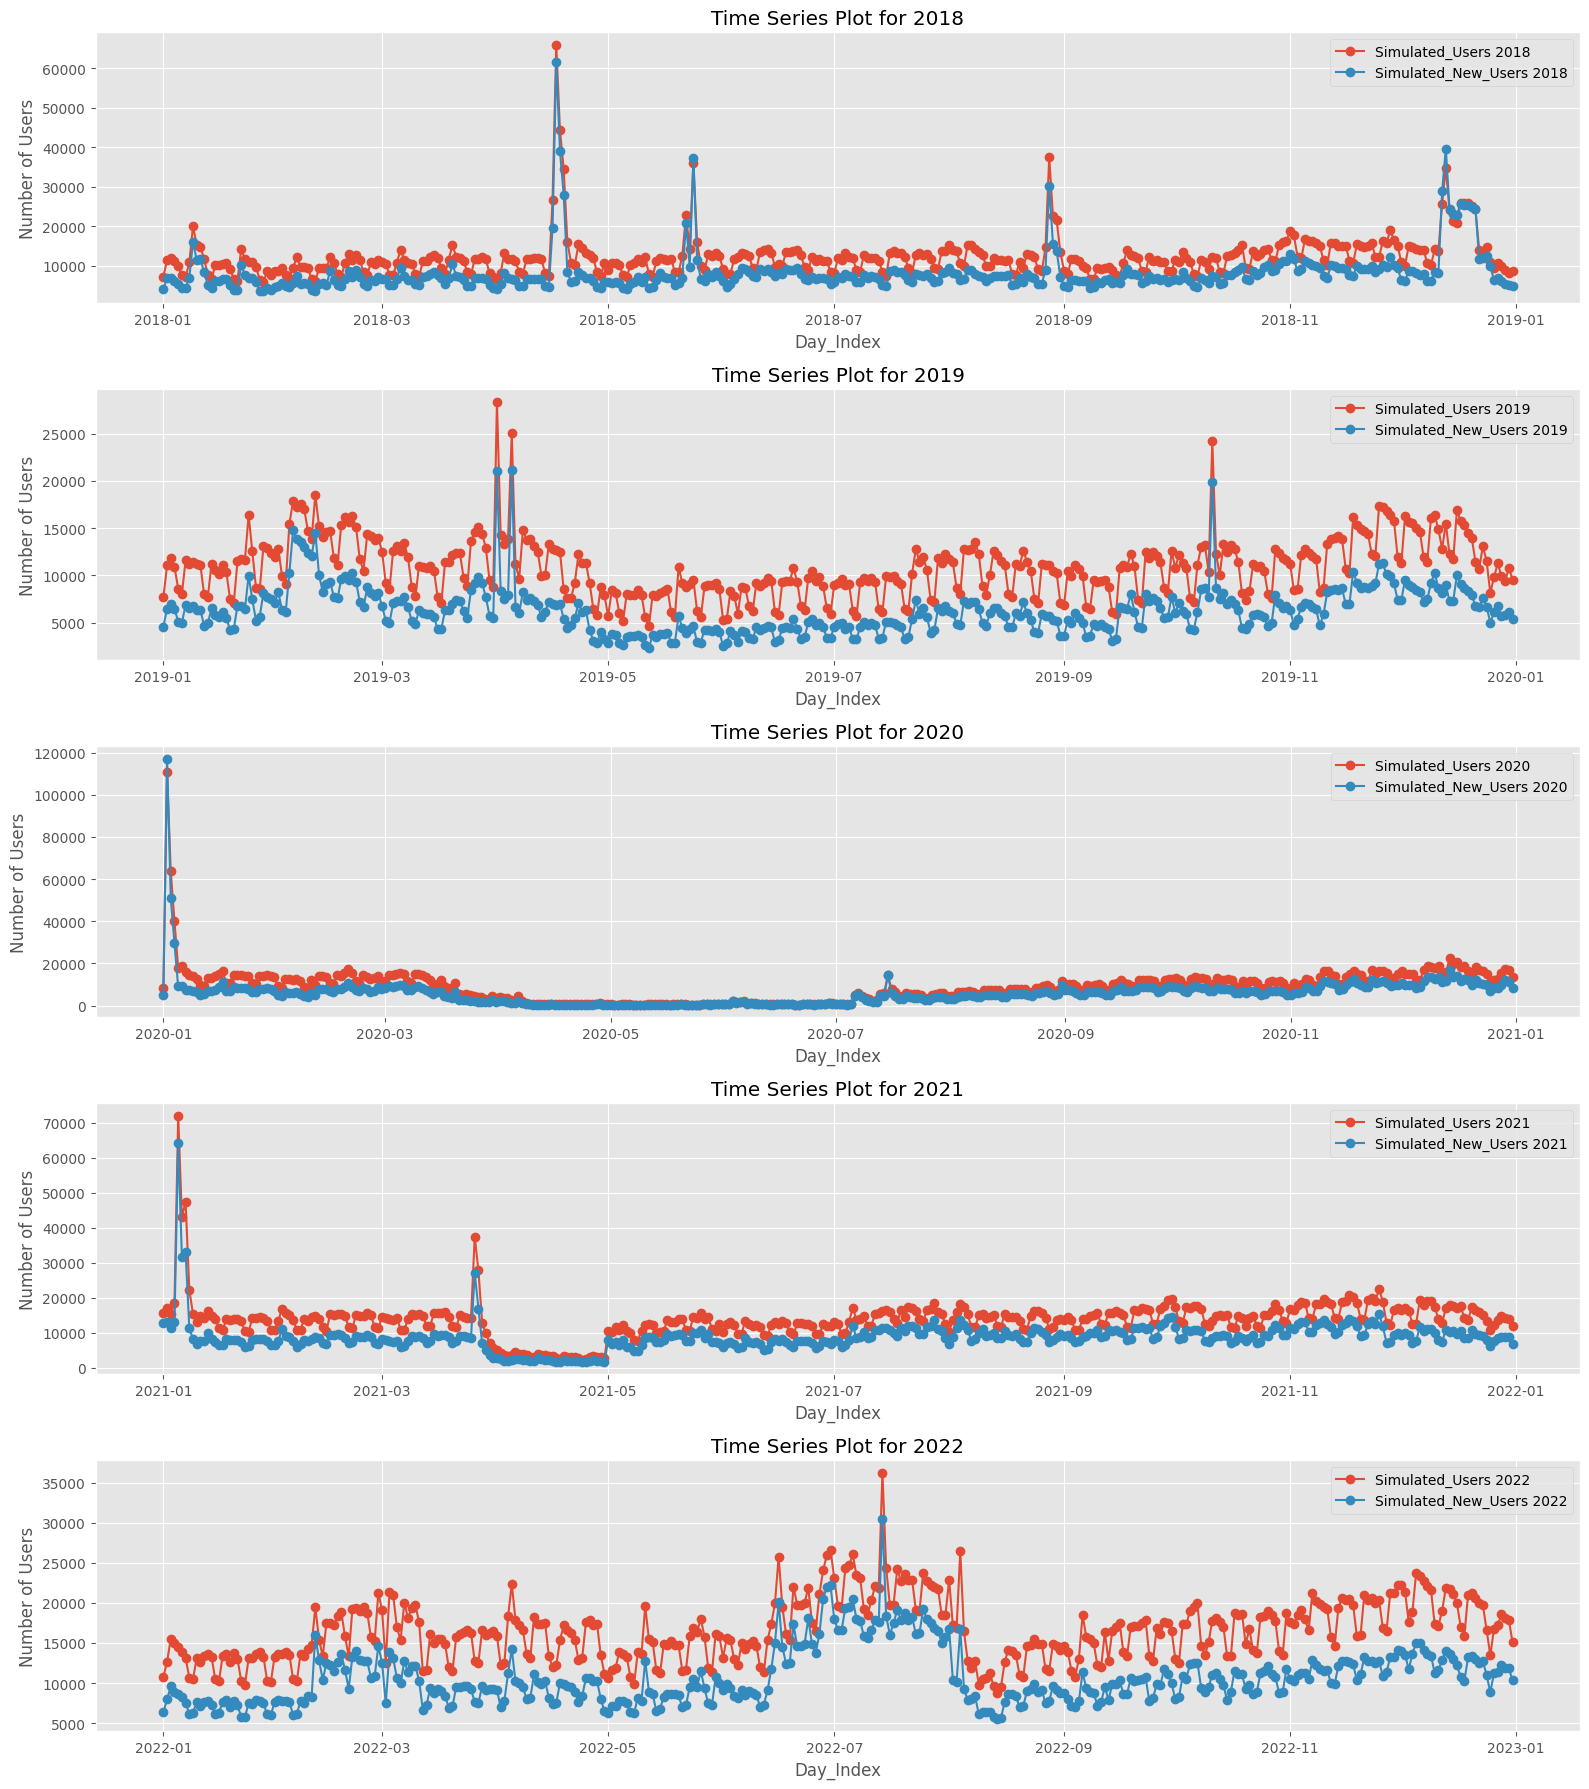

In [15]:
# Filter data for the desired date range for each year
start_date_2018 = '2018-01-01'
end_date_2018 = '2018-12-31'
start_date_2019 = '2019-01-01'
end_date_2019 = '2019-12-31'
start_date_2020 = '2020-01-01'
end_date_2020 = '2020-12-31'
start_date_2021 = '2021-01-01'
end_date_2021 = '2021-12-31'
start_date_2022 = '2022-01-01'
end_date_2022 = '2022-12-31'

filtered_df_2018 = df[(df['Day_Index'] >= start_date_2018) & (df['Day_Index'] <= end_date_2018)]
filtered_df_2019 = df[(df['Day_Index'] >= start_date_2019) & (df['Day_Index'] <= end_date_2019)]
filtered_df_2020 = df[(df['Day_Index'] >= start_date_2020) & (df['Day_Index'] <= end_date_2020)]
filtered_df_2021 = df[(df['Day_Index'] >= start_date_2021) & (df['Day_Index'] <= end_date_2021)]
filtered_df_2022 = df[(df['Day_Index'] >= start_date_2022) & (df['Day_Index'] <= end_date_2022)]

# Create subplots for each year
fig, axs = plt.subplots(5, 1, figsize=(16, 18))

# Plot for 2018
axs[0].plot(filtered_df_2018['Day_Index'], filtered_df_2018['Simulated_Users'], label='Simulated_Users 2018', marker='o', linestyle='-')
axs[0].plot(filtered_df_2018['Day_Index'], filtered_df_2018['Simulated_New_Users'], label='Simulated_New_Users 2018', marker='o', linestyle='-')
axs[0].set_title('Time Series Plot for 2018')
axs[0].set_xlabel('Day_Index')
axs[0].set_ylabel('Number of Users')
axs[0].legend()

# Plot for 2019
axs[1].plot(filtered_df_2019['Day_Index'], filtered_df_2019['Simulated_Users'], label='Simulated_Users 2019', marker='o', linestyle='-')
axs[1].plot(filtered_df_2019['Day_Index'], filtered_df_2019['Simulated_New_Users'], label='Simulated_New_Users 2019', marker='o', linestyle='-')
axs[1].set_title('Time Series Plot for 2019')
axs[1].set_xlabel('Day_Index')
axs[1].set_ylabel('Number of Users')
axs[1].legend()

# Plot for 2020
axs[2].plot(filtered_df_2020['Day_Index'], filtered_df_2020['Simulated_Users'], label='Simulated_Users 2020', marker='o', linestyle='-')
axs[2].plot(filtered_df_2020['Day_Index'], filtered_df_2020['Simulated_New_Users'], label='Simulated_New_Users 2020', marker='o', linestyle='-')
axs[2].set_title('Time Series Plot for 2020')
axs[2].set_xlabel('Day_Index')
axs[2].set_ylabel('Number of Users')
axs[2].legend()

# Plot for 2021
axs[3].plot(filtered_df_2021['Day_Index'], filtered_df_2021['Simulated_Users'], label='Simulated_Users 2021', marker='o', linestyle='-')
axs[3].plot(filtered_df_2021['Day_Index'], filtered_df_2021['Simulated_New_Users'], label='Simulated_New_Users 2021', marker='o', linestyle='-')
axs[3].set_title('Time Series Plot for 2021')
axs[3].set_xlabel('Day_Index')
axs[3].set_ylabel('Number of Users')
axs[3].legend()

# Plot for 2022
axs[4].plot(filtered_df_2022['Day_Index'], filtered_df_2022['Simulated_Users'], label='Simulated_Users 2022', marker='o', linestyle='-')
axs[4].plot(filtered_df_2022['Day_Index'], filtered_df_2022['Simulated_New_Users'], label='Simulated_New_Users 2022', marker='o', linestyle='-')
axs[4].set_title('Time Series Plot for 2022')
axs[4].set_xlabel('Day_Index')
axs[4].set_ylabel('Number of Users')
axs[4].legend()

plt.tight_layout()
plt.show()

Analyzing Jambojet's web traffic, significant spikes in 'Simulated_Users' and 'New_Simulated_Users' were noted in 2018, specifically during public and school holidays. 
- On December 12, 2018, 'Simulated_Users' peaked at 25,616, and 'New_Simulated_Users' at 28,818. The following day, December 13, 2018, witnessed even higher figures, with 'Simulated_Users' reaching 34,741 and 'New_Simulated_Users' at 39,630. Daily users remained consistently above 20,000 until December 22, 2018, when fluctuations led to declines, reaching lows of 8,086 by the end of the month.

- In 2019, from May to December, a general upward trend in traffic was observed. After the Moi Day holiday on October 11, 2019, 'Simulated_Users' peaked at 24,265, and 'New_Simulated_Users' at 19,908. Increased daily users were also seen from November 25 to 29, 2019, and from December 9 to 20, 2019.

- Despite the challenges posed by the COVID-19 pandemic in 2020, Jambojet showed signs of recovery from November 9 to December 31, 2020. 'Simulated_Users' ranged from 10,160 to 22,598, and 'New_Simulated_Users' from 7,056 to 17,105. This recovery coincided with the December holidays, allowing people to resume travel after a prolonged period of restrictions.

- In 2021, a general upward trend in 'Simulated_Users' and 'New_Simulated_Users' was observed after travel restrictions were lifted on May 1, 2021. Notable spikes occurred on September 29 and 30, 2021, and throughout November and December, aligning with the long summer and December holidays.

- From June 16 to August 4, 2022, the highest levels of web traffic to Jambojet's website were observed, marking the first full year post-COVID when tourism fully resumed as [1.5 million international visitors came in to tour the country in 2022](https://www.tourism.go.ke/wp-content/uploads/2023/02/ANNUAL-TOURISM-SECTOR-PERFORMANCE-REPORT-2022-2.pdf) compared to 567,800 in 2020, and likely contributed to the spike. During this period, 'Simulated_Users' ranged from 15,369 to 36,245, and 'New_Simulated_Users' from 10,127 to 30,434. The period also coincides with the long summer holiday for British systems schools in Kenya and when Kenyans living or studying in the diaspora visit Kenya on holiday. Despite a brief decline after August 4, web traffic steadily increased leading up to the December holidays, a peak season for tourism in Kenya.

## 9.4 Effect of seasons over the years

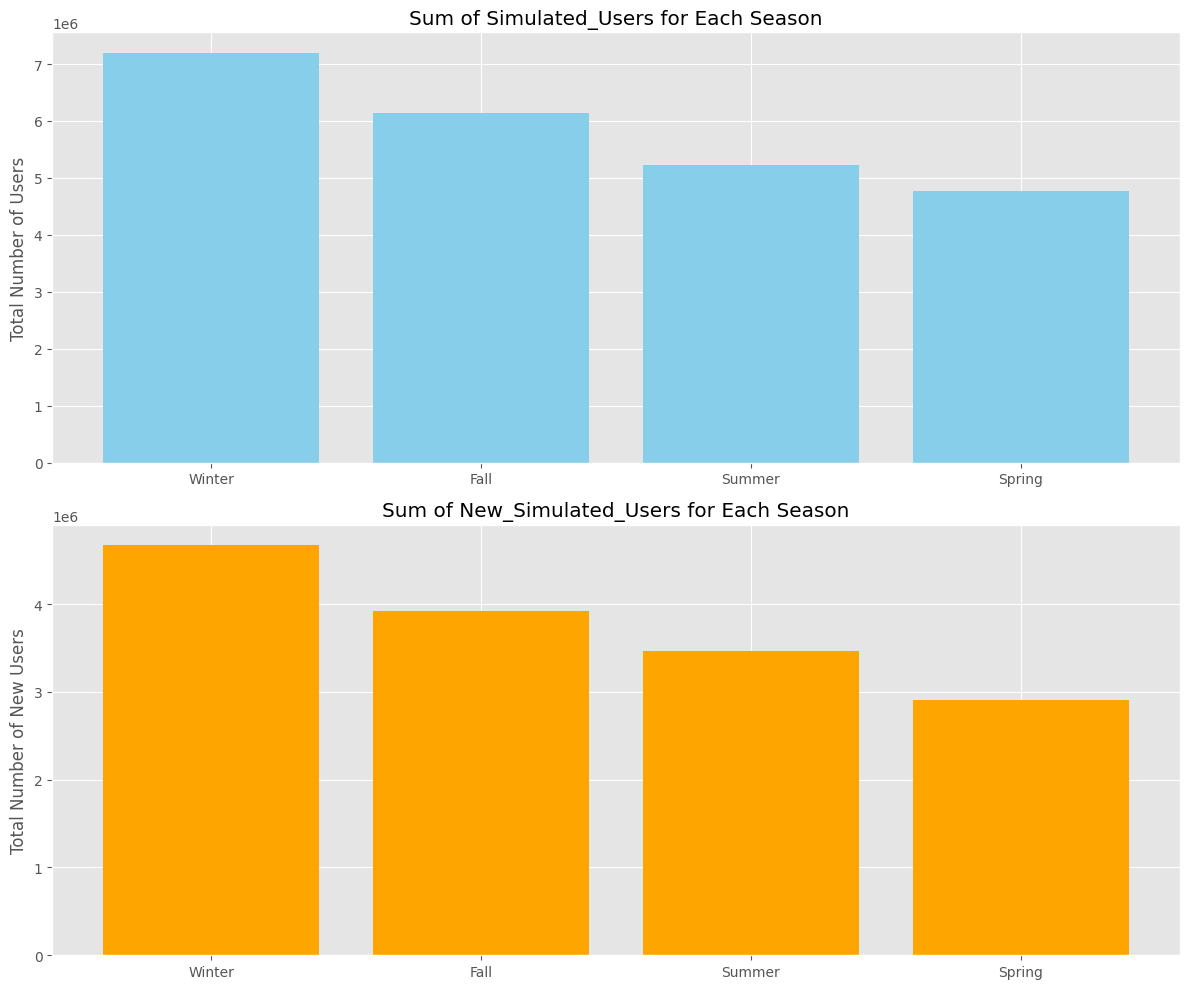

In [16]:
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


df['Season'] = df['Day_Index'].dt.month.map(categorize_season)

# Applying the categorization to create a new 'Season' column
df['Season'] = df['Day_Index'].dt.month.map(categorize_season)

# Creating a new DataFrame with the sum of 'Simulated_Users' and 'Simulated_New_Users' for each season
season_sum_df = df.groupby('Season').agg({'Simulated_Users': 'sum', 'Simulated_New_Users': 'sum'}).reset_index()

# Sorting the DataFrame by 'Simulated_Users' in descending order
season_sum_df = season_sum_df.sort_values(by='Simulated_Users', ascending=False)

# Plotting the sum of 'Simulated_Users' and 'Simulated_New_Users' for each season
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for 'Simulated_Users'
axs[0].bar(season_sum_df['Season'], season_sum_df['Simulated_Users'], color='skyblue')
axs[0].set_title('Sum of Simulated_Users for Each Season')
axs[0].set_ylabel('Total Number of Users')
plt.grid()

# Bar plot for 'New_Simulated_Users'
axs[1].bar(season_sum_df['Season'], season_sum_df['Simulated_New_Users'], color='orange')
axs[1].set_title('Sum of New_Simulated_Users for Each Season')
axs[1].set_ylabel('Total Number of New Users')

plt.tight_layout()
plt.grid()
plt.show()

Over a six-year period, the analysis reveals that Winter consistently attracted the highest web traffic for both 'Simulated_Users' and 'New_Simulated_Users,' peaking at approximately 7 million and 4.5 million users, respectively. Following closely, Autumn exhibited robust engagement with around 6 million 'Simulated_Users' and 4 million 'New_Simulated_Users.' Summer followed suit with an approximate count of 5 million 'Simulated_Users' and 3.5 million 'New_Simulated_Users.' Lastly, Spring recorded about 4.8 million 'Simulated_Users' and 2.9 million 'New_Simulated_Users.'

These patterns align with the observed trends, indicating that promotions yielding the highest web traffic counts often occur during Autumn and Winter. This correlation also corresponds to broader travel patterns in the country. As the end of the month approaches, people tend to take leave from work, and schools close for the December holidays, boosting travel interest. The Autumn and Winter seasons, associated with increased tourism and travel, witness a surge in visits and bookings on Jambojet's website. Moreover, the Summer holiday, though less popular for international tourists compared to Winter, becomes an opportune time for Kenyans in the diaspora to return home. Additionally, students in British system schools take extended breaks during the Summer months, contributing to heightened travel activity during this season.

## 9.5 Month-wise and year-wise traffic trends

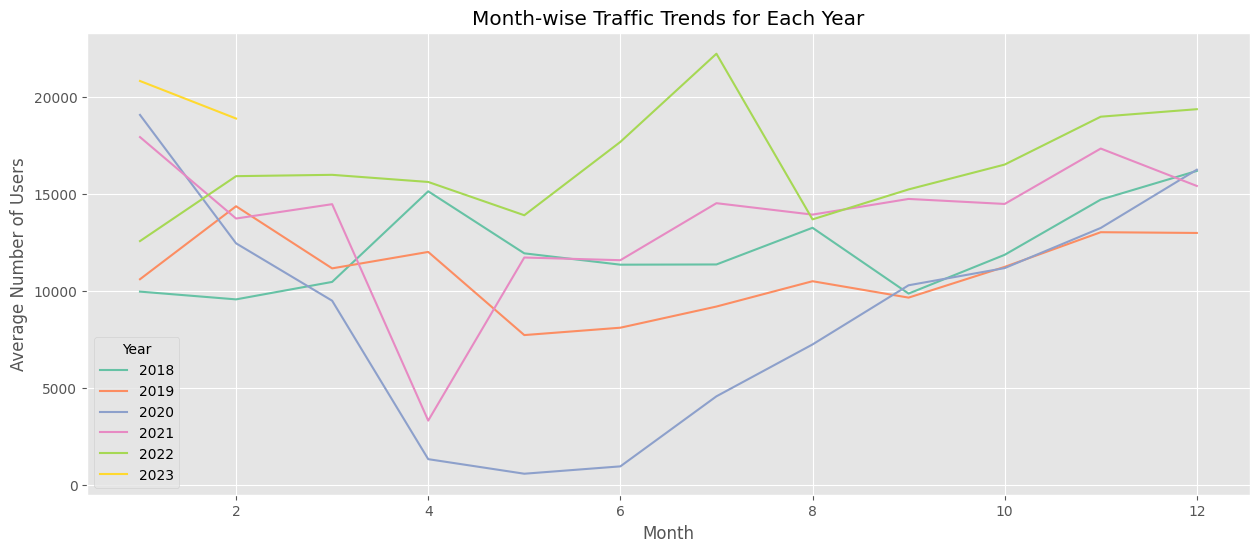

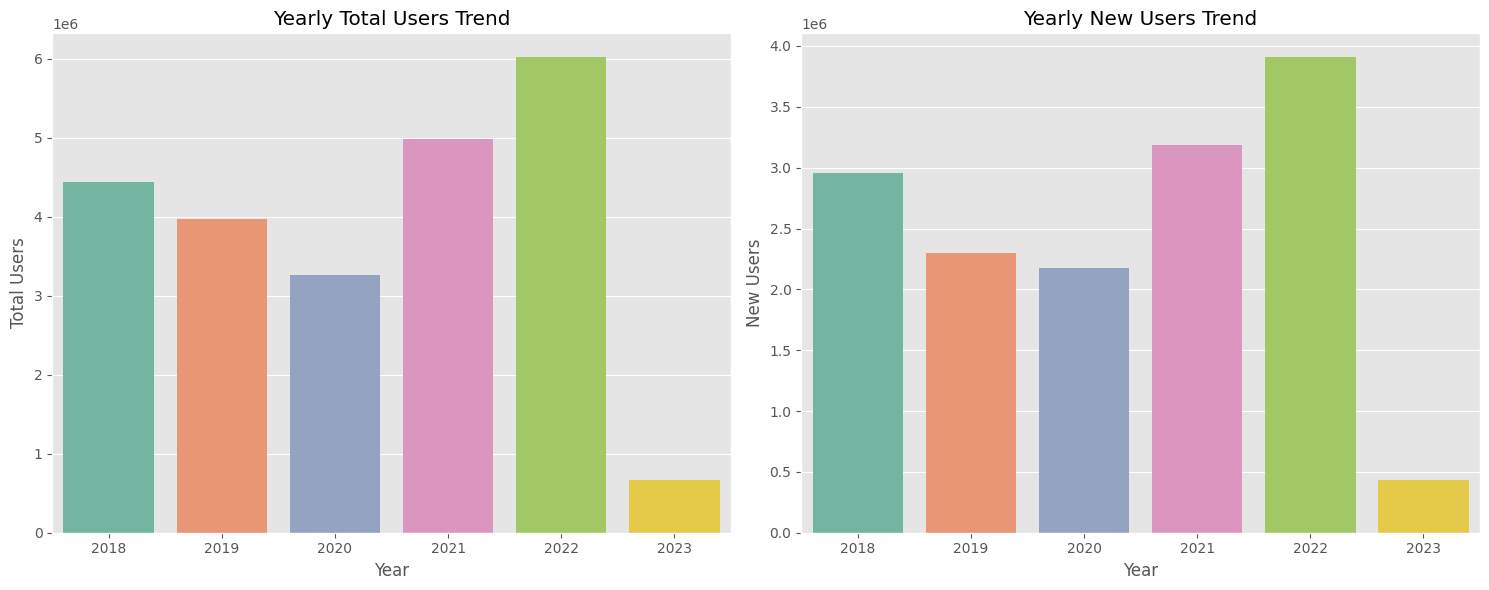

In [17]:
# Extracting year, month, and day for further analysis
df['Year'] = df['Day_Index'].dt.year
df['Month'] = df['Day_Index'].dt.month
df['Day'] = df['Day_Index'].dt.day

# Month-wise trends for each year
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Simulated_Users', hue='Year', data=df, palette='Set2', ci=None)
plt.title('Month-wise Traffic Trends for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Number of Users')
plt.legend(title='Year')
plt.show()

# Year-wise trends - select only the columns you want to sum
columns_to_sum = ['Simulated_Users', 'Simulated_New_Users']
yearly_trends = df.groupby('Year')[columns_to_sum].sum()

# Plotting year-wise trends for total and new users
plt.figure(figsize=(15, 6))

# Plotting for total users
plt.subplot(1, 2, 1)
sns.barplot(x=yearly_trends.index, y='Simulated_Users', data=yearly_trends, palette='Set2')
plt.title('Yearly Total Users Trend')
plt.xlabel('Year')
plt.ylabel('Total Users')

# Plotting for new users
plt.subplot(1, 2, 2)
sns.barplot(x=yearly_trends.index, y='Simulated_New_Users', data=yearly_trends, palette='Set2')
plt.title('Yearly New Users Trend')
plt.xlabel('Year')
plt.ylabel('New Users')

plt.tight_layout()
plt.show()

### Observation

- The month-wise trends indicate that web traffic may have specific seasonal patterns that vary from year to year.
- Yearly trends show fluctuations in total and new users, which were influenced by the various marketing campaigns and the COVID-19 pandemic

## 9.6 Monthly Analysis across the years

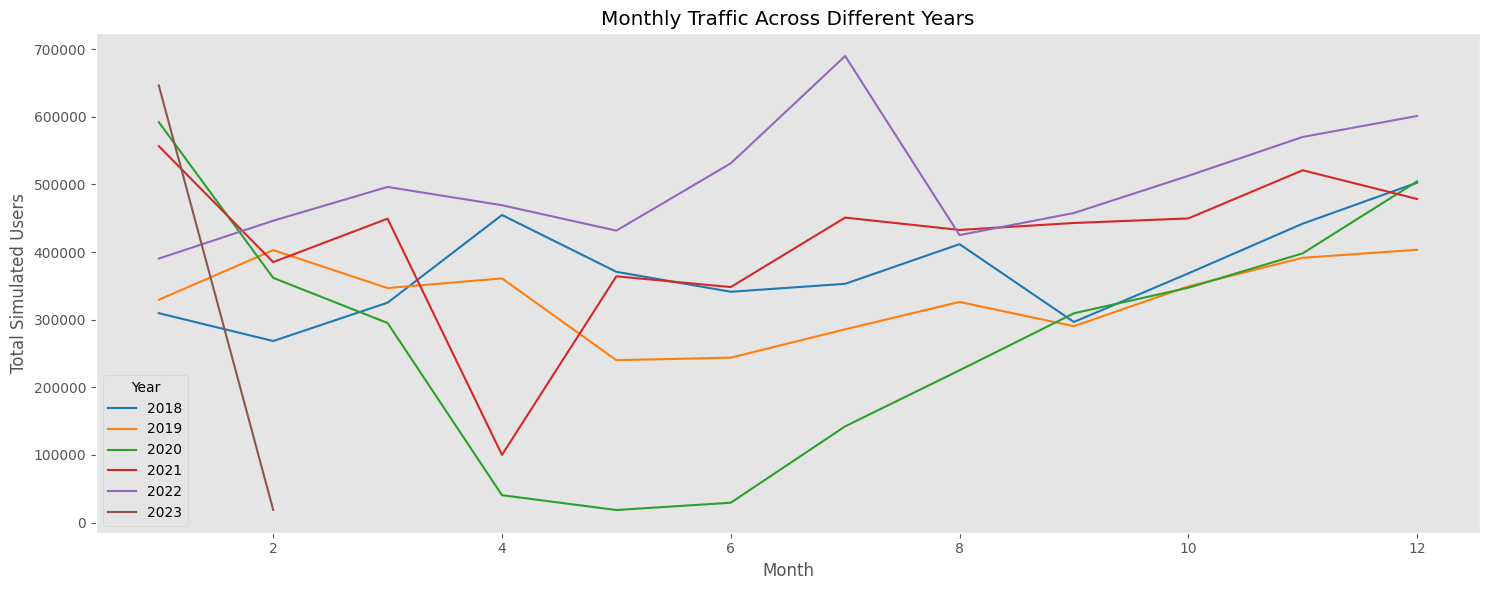

In [18]:
# Select only the columns you want to sum
columns_to_sum = ['Simulated_Users', 'Simulated_New_Users']  # Add other numeric columns as needed

monthly_traffic = df.groupby(['Year', 'Month'])[columns_to_sum].sum().reset_index()

# Plotting monthly traffic for each year
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Simulated_Users', hue='Year', data=monthly_traffic, palette='tab10', ci=None)
plt.title('Monthly Traffic Across Different Years')
plt.xlabel('Month')
plt.ylabel('Total Simulated Users')
plt.legend(title='Year')
plt.tight_layout()
plt.grid()
plt.show()

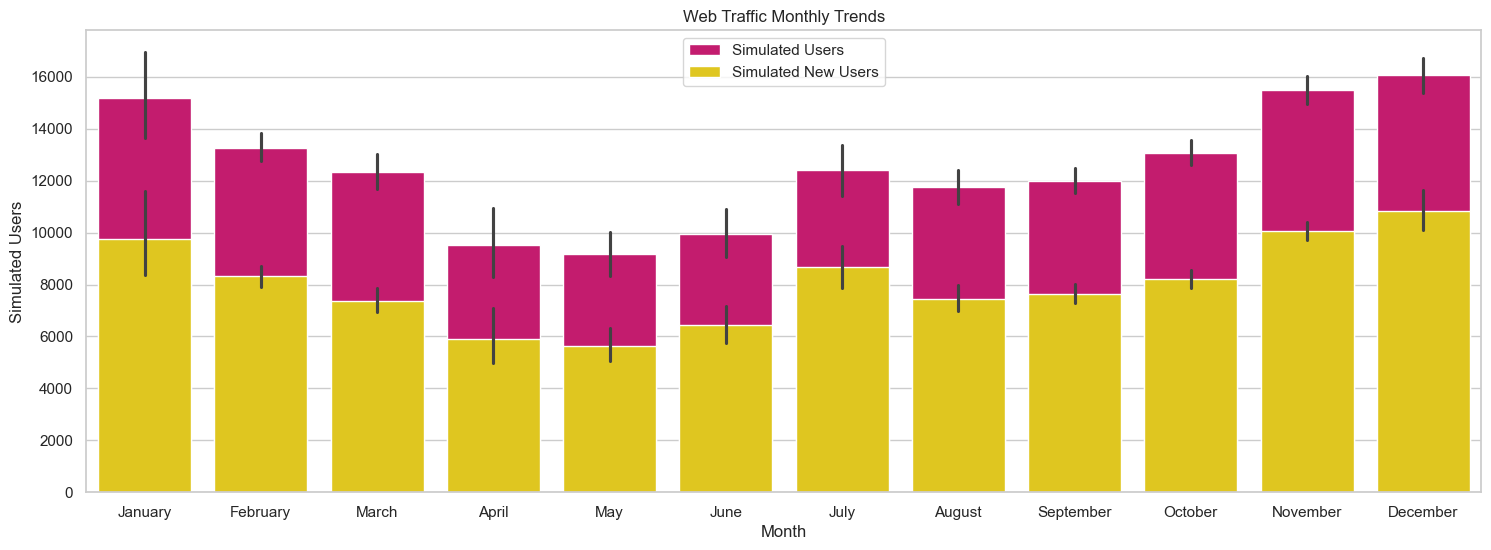

In [19]:
# Grouping by week and month
df['Week'] = df['Day_Index'].dt.strftime('%U')
df['Month'] = df['Day_Index'].dt.strftime('%B')

# Defining the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Setting the seaborn style
sns.set(style="whitegrid")

# Plotting monthly trends
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='Month', y='Simulated_Users', data=df, ax=ax, 
            order=month_order, color='#df006e', label='Simulated Users')

sns.barplot(x='Month', y='Simulated_New_Users', data=df, ax=ax, 
            order=month_order, color='#ffdd00', label='Simulated New Users')

ax.set_title('Web Traffic Monthly Trends')
ax.set_xlabel('Month')
ax.set_ylabel('Simulated Users')
plt.legend() 
plt.show()

## 9.7 Weekly Analysis accross the years

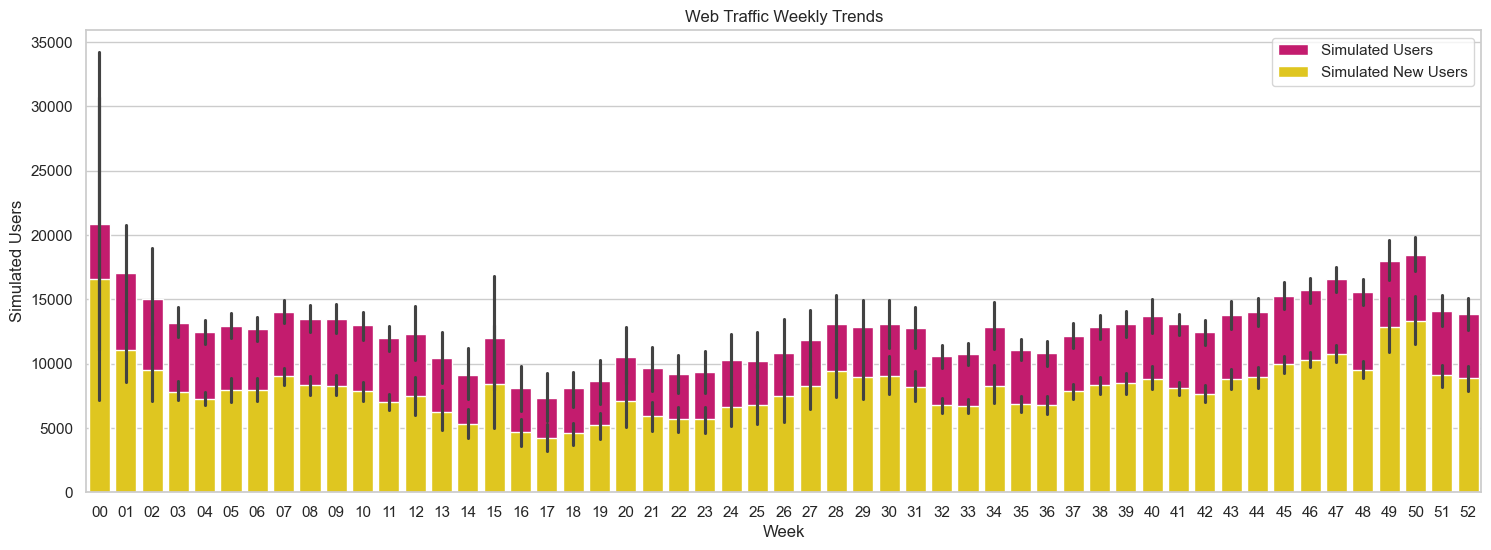

In [20]:
# Plotting weekly trend
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='Week', y='Simulated_Users', data=df, ax=ax, color='#df006e', label='Simulated Users')
sns.barplot(x='Week', y='Simulated_New_Users', data=df, ax=ax, color='#ffdd00', label='Simulated New Users')
ax.set_title('Web Traffic Weekly Trends')
ax.set_xlabel('Week')
ax.set_ylabel('Simulated Users')
plt.legend()
plt.show()

## 9.8 Days of the week Analysis accross the years

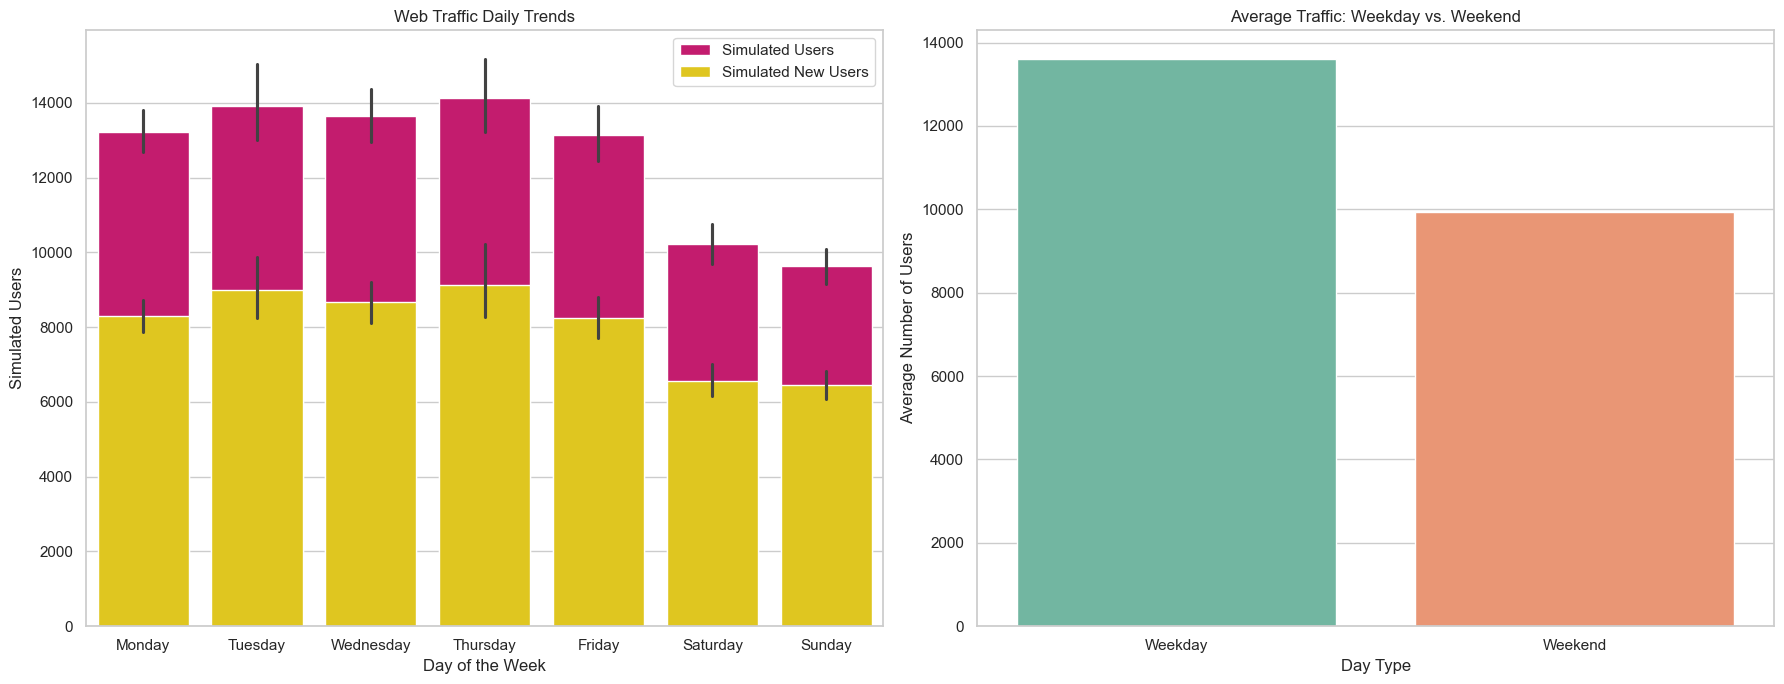

In [21]:
# Extract day of the week
df['Day_of_Week'] = pd.Categorical(df['Day_Index'].dt.strftime('%A'),
                                    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                'Saturday', 'Sunday'], ordered=True)

# Setting the seaborn style
sns.set(style="whitegrid")

# Create a figure with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plotting daily trends on the first subplot
sns.barplot(x='Day_of_Week', y='Simulated_Users', data=df, ax=ax1, color='#df006e', label='Simulated Users')
sns.barplot(x='Day_of_Week', y='Simulated_New_Users', data=df, ax=ax1, color='#ffdd00', label='Simulated New Users')

ax1.set_title('Web Traffic Daily Trends')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Simulated Users')
ax1.legend()

# Comparing weekday vs. weekend traffic
df['Weekday_vs_Weekend'] = np.where(df['Day_of_Week'] < 'Saturday', 'Weekday', 'Weekend')

# Aggregate only numerical columns for mean calculation
numeric_cols = ['Simulated_Users', 'Simulated_New_Users']  # add other numeric columns if present
weekday_weekend_traffic = df.groupby('Weekday_vs_Weekend')[numeric_cols].mean().reset_index()

# Plotting the second subplot
sns.barplot(x='Weekday_vs_Weekend', y='Simulated_Users', data=weekday_weekend_traffic, palette='Set2', ax=ax2)

ax2.set_title('Average Traffic: Weekday vs. Weekend')
ax2.set_xlabel('Day Type')
ax2.set_ylabel('Average Number of Users')

plt.tight_layout()  # Adjusts the layout
plt.show()

### Observation

- There's a distinct difference in the web traffic on the weekends vs weekdays with Thursdays recording the highest traffic throught the years followed by Tuesdays. This could be an attribute of the the traveler behaviours where most people visit the website to book flights for the weekend getaways.

## 10. Correlation Analysis

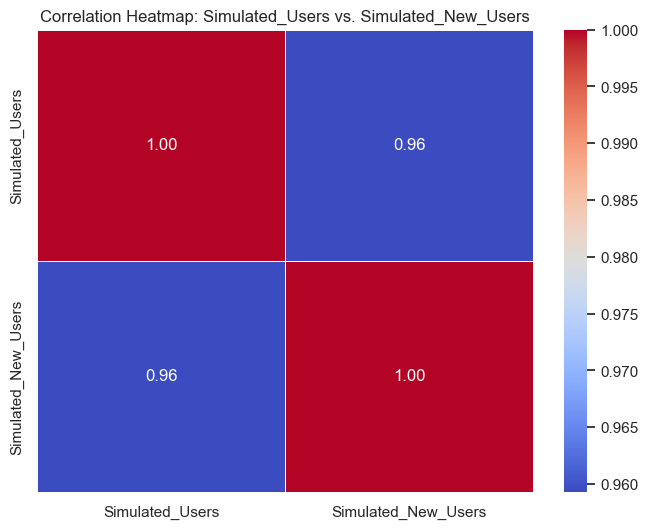

Correlation Coefficient between Simulated_Users and Simulated_New_Users: 0.9593201573349592


In [22]:
# Calculating correlation coefficient
correlation = df['Simulated_Users'].corr(df['Simulated_New_Users'])

# Calculating the correlation matrix
correlation_matrix = df[['Simulated_Users', 'Simulated_New_Users']].corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Simulated_Users vs. Simulated_New_Users')
plt.show()

print(f"Correlation Coefficient between Simulated_Users and Simulated_New_Users: {correlation}")

# 11. Time Series Modeling

## 11.1 Data Preprocessing for Modeling

In [23]:
# Check a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1858 entries, 0 to 1857
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Day_Index            1858 non-null   datetime64[ns]
 1   Simulated_Users      1858 non-null   int64         
 2   Simulated_New_Users  1858 non-null   int64         
 3   Season               1858 non-null   object        
 4   Year                 1858 non-null   int32         
 5   Month                1858 non-null   object        
 6   Day                  1858 non-null   int32         
 7   Week                 1858 non-null   object        
 8   Day_of_Week          1858 non-null   category      
 9   Weekday_vs_Weekend   1858 non-null   object        
dtypes: category(1), datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 132.8+ KB


In [24]:
# Summary statistics of the dataset
summary_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

summary_stats, missing_values


(                 Day_Index  Simulated_Users  Simulated_New_Users         Year  \
 count                 1858      1858.000000          1858.000000  1858.000000   
 mean   2020-07-17 12:00:00     12562.222282          8053.693757  2020.051668   
 min    2018-01-01 00:00:00       340.000000           248.000000  2018.000000   
 25%    2019-04-10 06:00:00      9511.750000          5719.250000  2019.000000   
 50%    2020-07-17 12:00:00     12344.500000          7544.500000  2020.000000   
 75%    2021-10-24 18:00:00     15208.250000          9550.750000  2021.000000   
 max    2023-02-01 00:00:00    110612.000000        117086.000000  2023.000000   
 std                    NaN      6390.231945          5469.044221     1.455319   
 
                Day  
 count  1858.000000  
 mean     15.724435  
 min       1.000000  
 25%       8.000000  
 50%      16.000000  
 75%      23.000000  
 max      31.000000  
 std       8.808466  ,
 Day_Index              0
 Simulated_Users        0
 Simulate

It is important to have the Day_Index column as our index since it has some advantages such as easy visualization with dates on the x-axis, and it allows for convenient time-based operations

In [25]:
# Create a new DataFrame with 'Day_Index' as the index
df_with_new_index = df.set_index('Day_Index').copy()

# Check the top 10 records in the new DataFrame
df_with_new_index.head(10)

,Simulated_Users,Simulated_New_Users,Season,Year,Month,Day,Week,Day_of_Week,Weekday_vs_Weekend
Day_Index,,,,,,,,,
2018-01-01,7111,4159,Winter,2018,January,1,00,Monday,Weekday
2018-01-02,11451,6840,Winter,2018,January,2,00,Tuesday,Weekday
2018-01-03,11889,6940,Winter,2018,January,3,00,Wednesday,Weekday
2018-01-04,11027,6171,Winter,2018,January,4,00,Thursday,Weekday
2018-01-05,9767,5348,Winter,2018,January,5,00,Friday,Weekday
2018-01-06,7505,4226,Winter,2018,January,6,00,Saturday,Weekend
2018-01-07,6988,4393,Winter,2018,January,7,01,Sunday,Weekend
2018-01-08,10788,6910,Winter,2018,January,8,01,Monday,Weekday
2018-01-09,19977,16001,Winter,2018,January,9,01,Tuesday,Weekday


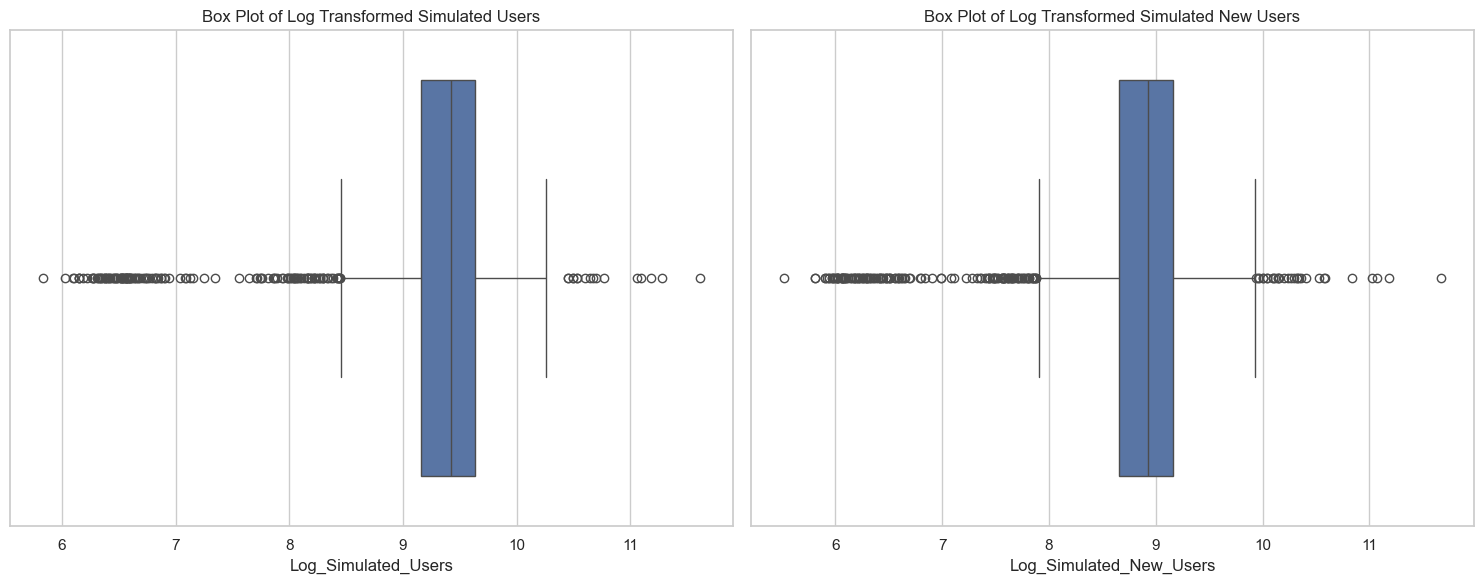

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Applying log transformation to the data
# Adding a small constant to avoid log(0) which is undefined
df_with_new_index['Log_Simulated_Users'] = np.log(df_with_new_index['Simulated_Users'] + 1)
df_with_new_index['Log_Simulated_New_Users'] = np.log(df_with_new_index['Simulated_New_Users'] + 1)

# Creating box plots for the transformed data
plt.figure(figsize=(15, 6))

# Box plot for Transformed Simulated Users
plt.subplot(1, 2, 1)
sns.boxplot(x=df_with_new_index['Log_Simulated_Users'])
plt.title('Box Plot of Log Transformed Simulated Users')

# Box plot for Transformed Simulated New Users
plt.subplot(1, 2, 2)
sns.boxplot(x=df_with_new_index['Log_Simulated_New_Users'])
plt.title('Box Plot of Log Transformed Simulated New Users')

plt.tight_layout()
plt.show()


In [27]:
df_with_new_index.head(10)

,Simulated_Users,Simulated_New_Users,Season,Year,Month,Day,Week,Day_of_Week,Weekday_vs_Weekend,Log_Simulated_Users,Log_Simulated_New_Users
Day_Index,,,,,,,,,,,
2018-01-01,7111,4159,Winter,2018,January,1,00,Monday,Weekday,8.869539,8.333270
2018-01-02,11451,6840,Winter,2018,January,2,00,Tuesday,Weekday,9.345920,8.830689
2018-01-03,11889,6940,Winter,2018,January,3,00,Wednesday,Weekday,9.383453,8.845201
2018-01-04,11027,6171,Winter,2018,January,4,00,Thursday,Weekday,9.308193,8.727778
2018-01-05,9767,5348,Winter,2018,January,5,00,Friday,Weekday,9.186867,8.584665
2018-01-06,7505,4226,Winter,2018,January,6,00,Saturday,Weekend,8.923458,8.349248
2018-01-07,6988,4393,Winter,2018,January,7,01,Sunday,Weekend,8.852093,8.387995
2018-01-08,10788,6910,Winter,2018,January,8,01,Monday,Weekday,9.286282,8.840870
2018-01-09,19977,16001,Winter,2018,January,9,01,Tuesday,Weekday,9.902387,9.680469


We drop the Simulated_New_Users and the rest of the columns column since most of our future analysis will be based on the Simulated_Users.

In [28]:
# Drop the specified columns
columns_to_drop = ['Year', 'Month', 'Day', 'Week', 'Simulated_Users', 'Simulated_New_Users', 'Season','Day_of_Week','Weekday_vs_Weekend','Log_Simulated_New_Users' ]
df_with_new_index.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm the changes
df_with_new_index.head(10)

,Log_Simulated_Users
Day_Index,
2018-01-01,8.869539
2018-01-02,9.345920
2018-01-03,9.383453
2018-01-04,9.308193
2018-01-05,9.186867
2018-01-06,8.923458
2018-01-07,8.852093
2018-01-08,9.286282
2018-01-09,9.902387


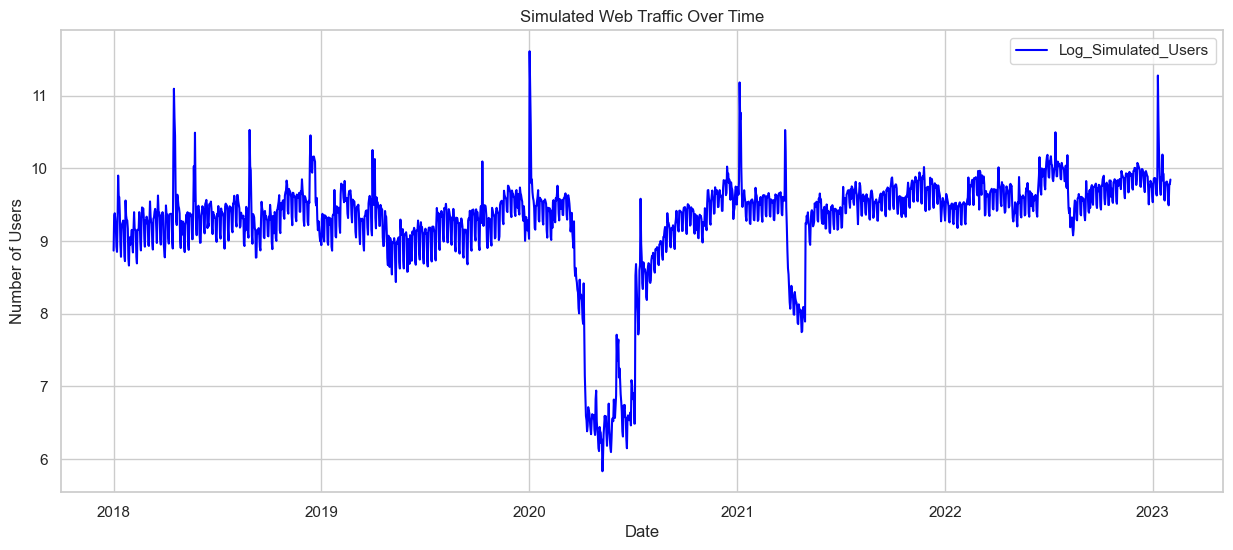

In [29]:
# Visualize the time series data
plt.figure(figsize=(15, 6))
plt.plot(df_with_new_index['Log_Simulated_Users'], label='Log_Simulated_Users', color='blue')
plt.title('Simulated Web Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

### 11.2 Removing Trends

In [30]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

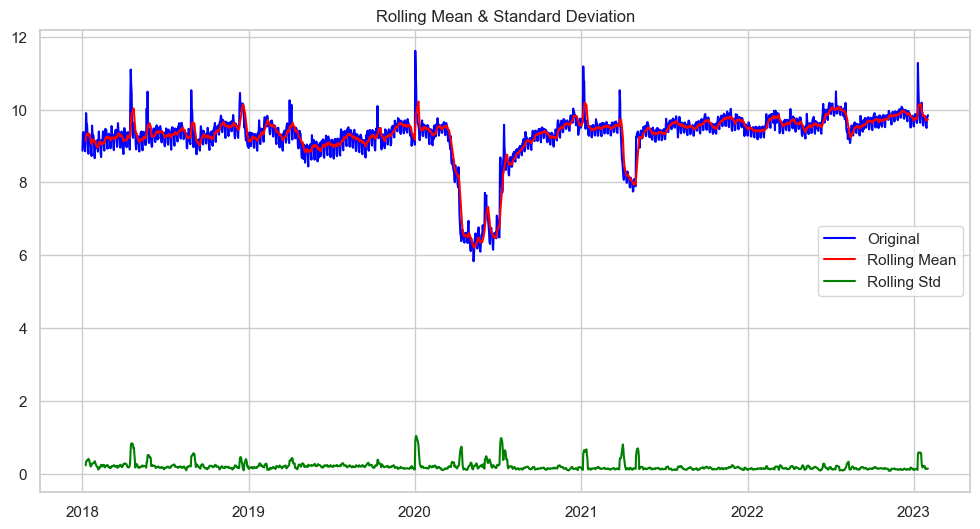

Results of Dickey-Fuller Test: 

Test Statistic                   -3.347210
p-value                           0.012896
#Lags Used                       22.000000
Number of Observations Used    1835.000000
Critical Value (1%)              -3.433919
Critical Value (5%)              -2.863116
Critical Value (10%)             -2.567609
dtype: float64


In [31]:
stationarity_check(df_with_new_index)

The original time series, rolling mean, and standard deviation lines follow somehow similar patterns, suggesting that there might be some stability and consistency in the data. This observation is often indicative of a stationary time series

### Observation

#### Analysis of Dickey-Fuller Test Results

* **Test Statistic:**  The more negative the test statistic, the more likely we are to reject the null hypothesis (which assumes non-stationarity). In this case, the test statistic is -3.926642.

* **p-value:** The p-value is 0.001847, which is less than our significance level (alpha) of 0.05. A low p-value suggests that we can reject the null hypothesis of non-stationarity. In other words, the data is likely stationary.

* **Lags Used:** The number of lags used in the regression when determining the test statistic. In this case, 22 lags were used.

* **Number of Observations Used:** The number of observations used in the ADF regression and calculation of critical values.

* **Critical Values:** These are the critical values at the 1%, 5%, and 10% significance levels. The test statistic is lower(more negative) than all the critical values, suggesting stationarity.

### Interpretation

* The test statistic is more negative than the critical values, indicating that we can reject the null hypothesis.

* The p-value is less than 0.05, further supporting the rejection of the null hypothesis.

* Since the null hypothesis of non-stationarity is rejected, it suggests that the time series is likely stationary and there are no apparent trends. Therefore, we can proceed with time series modelling

### 11.3 Decomposition

The rolling statistics and ADF test seem to indicate that the data is stationary. We will perform decomposition to identify and visualize the underlying patterns within the time series data, separate the signal (trend and seasonality) from the noise (residuals) and provide a more interpretable representation of the time series, making it easier to communicate findings.

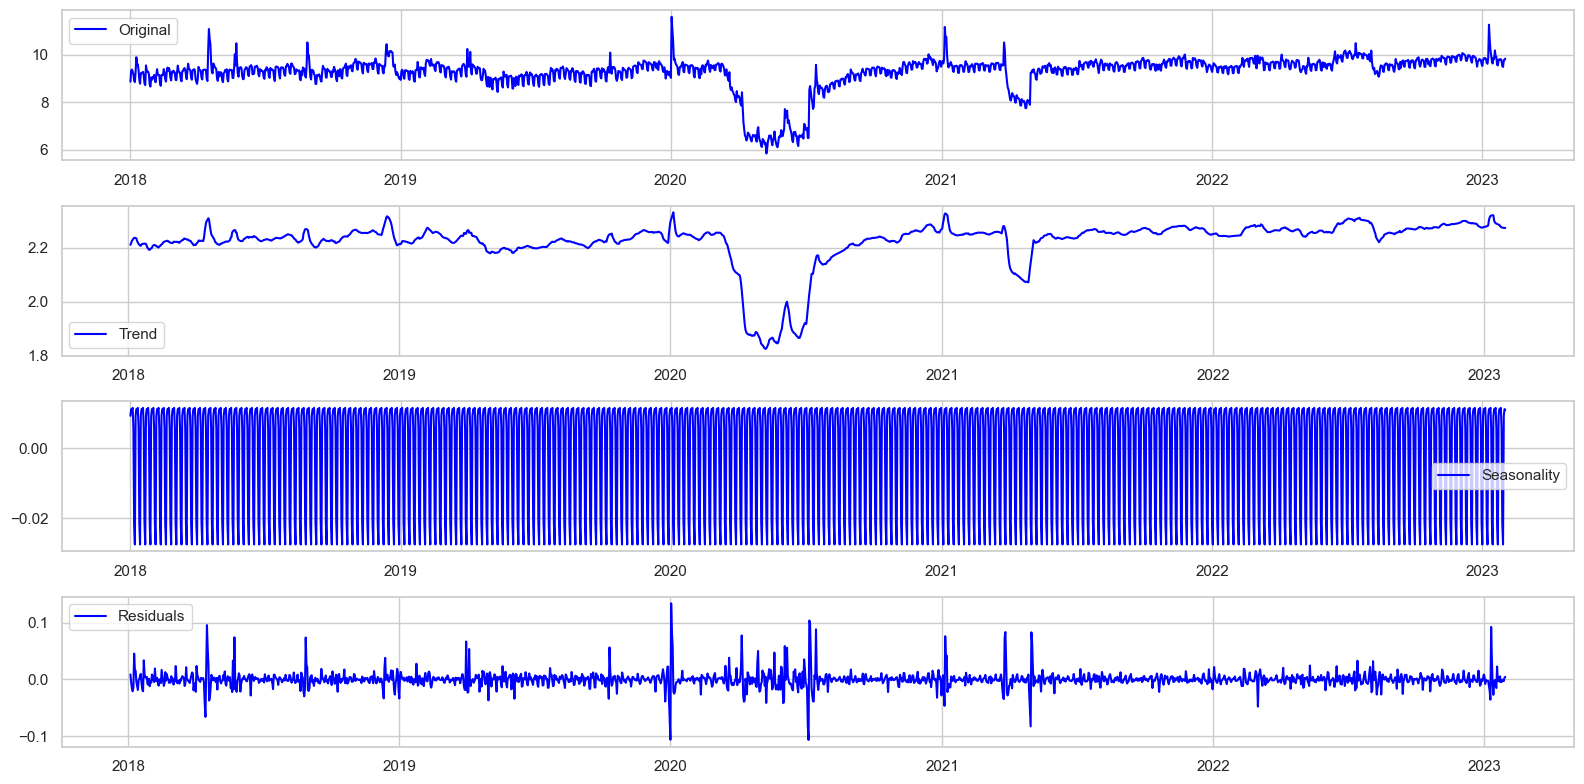

In [32]:
# Apply seasonal_decompose()
decomposition = sd(np.log(df_with_new_index))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(df_with_new_index, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### 11.4 Correlation and Autocorrelation

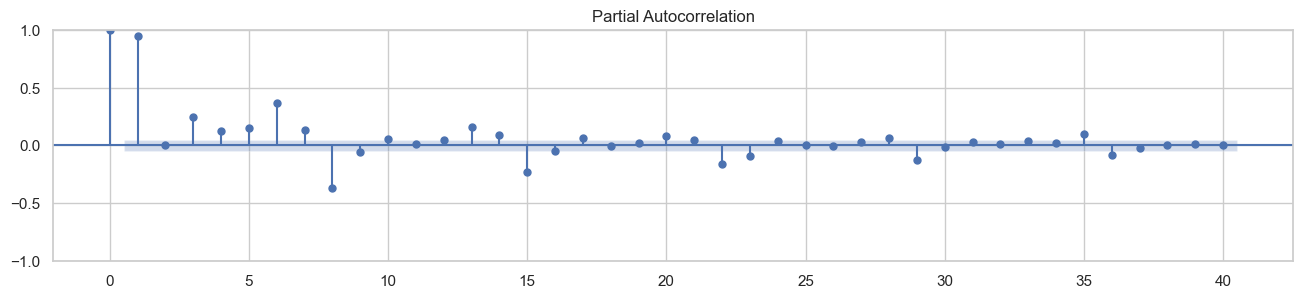

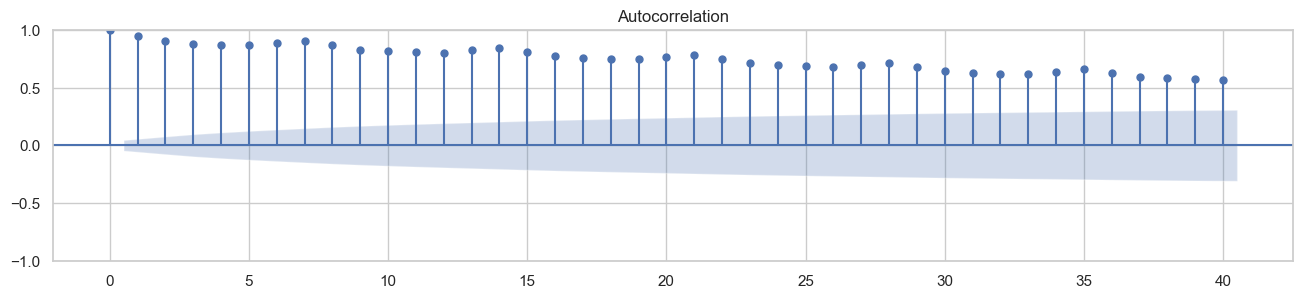

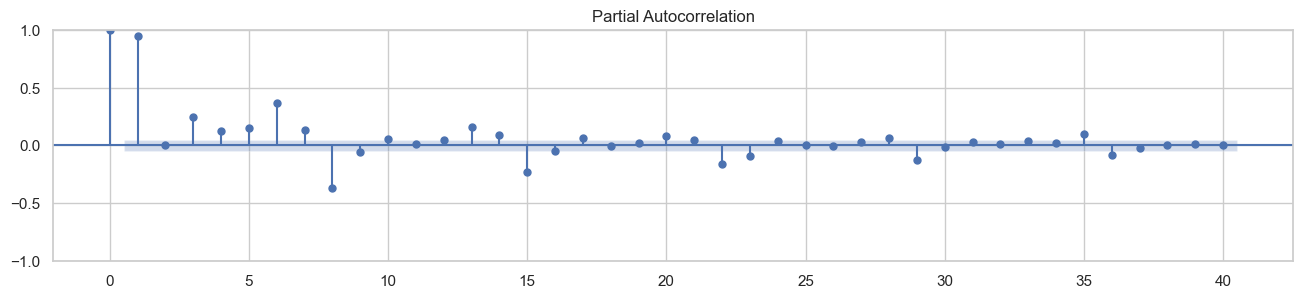

In [33]:
# Correlation and Autocorrelation plots
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(df_with_new_index, ax=ax, lags=40)

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(df_with_new_index, ax=ax, lags=40, method="ywm")

# 12. ARIMA Model

## 12.1 Model 1 (Baseline): ARIMA(1,0) Model

In [34]:
# Split the data into train and test sets
n_obs = len(df_with_new_index)
train_size = int(n_obs * 0.8) 
train, test = df_with_new_index.iloc[:train_size], df_with_new_index.iloc[train_size:]

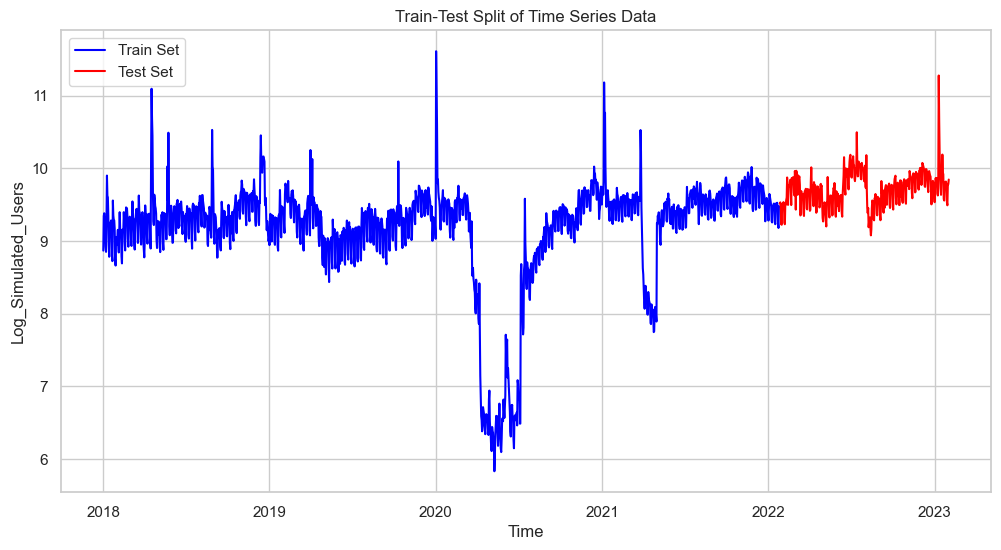

In [35]:
# Plot the train-test split
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Log_Simulated_Users'], label='Train Set', color='blue')
plt.plot(test.index, test['Log_Simulated_Users'], label='Test Set', color='red')
plt.title('Train-Test Split of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Log_Simulated_Users')
plt.legend()
plt.show()

In [36]:
# Instantiate an AR(1) model to the df
mod_arma = ARIMA(train['Log_Simulated_Users'], order=(1,0,0))

In [37]:
# Fit the model to data
arma = mod_arma.fit()

In [38]:
# Print out summary information on the fit
print(arma.summary())

                                SARIMAX Results                                
Dep. Variable:     Log_Simulated_Users   No. Observations:                 1486
Model:                  ARIMA(1, 0, 0)   Log Likelihood                  24.198
Date:                 Tue, 23 Jan 2024   AIC                            -42.396
Time:                         15:18:56   BIC                            -26.485
Sample:                     01-01-2018   HQIC                           -36.466
                          - 01-25-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1604      0.138     66.214      0.000       8.889       9.432
ar.L1          0.9492      0.006    148.212      0.000       0.937       0.962
sigma2         0.0566      0.001     67.603 

In [39]:
# Print out the estimate for the constant and for theta
print(arma.params)

const     9.160373
ar.L1     0.949215
sigma2    0.056584
dtype: float64


In [40]:
# Evaluate the model
# Make predictions
test_pred = arma.get_forecast(steps=len(test)).predicted_mean

# Calculate the RMSE for the predictions on the test set
test_mse = mean_squared_error(test['Log_Simulated_Users'], test_pred)
rmse = sqrt(test_mse)

print(f'Test Data RMSE: {rmse}')

Test Data RMSE: 0.5975652676452762


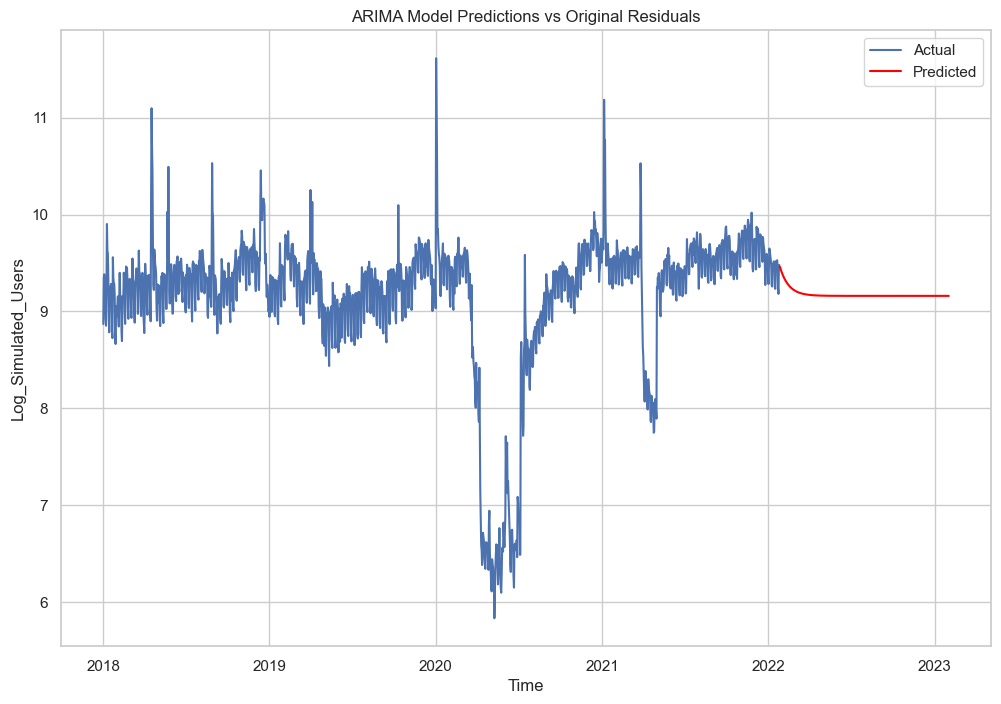

In [41]:
# Visualizing the results
plt.figure(figsize=(12, 8))
plt.plot(train['Log_Simulated_Users'], label='Actual')
plt.plot(test_pred, label='Predicted', color='red')
plt.title('ARIMA Model Predictions vs Original Residuals')
plt.xlabel('Time')
plt.ylabel('Log_Simulated_Users')
plt.legend()
plt.show()

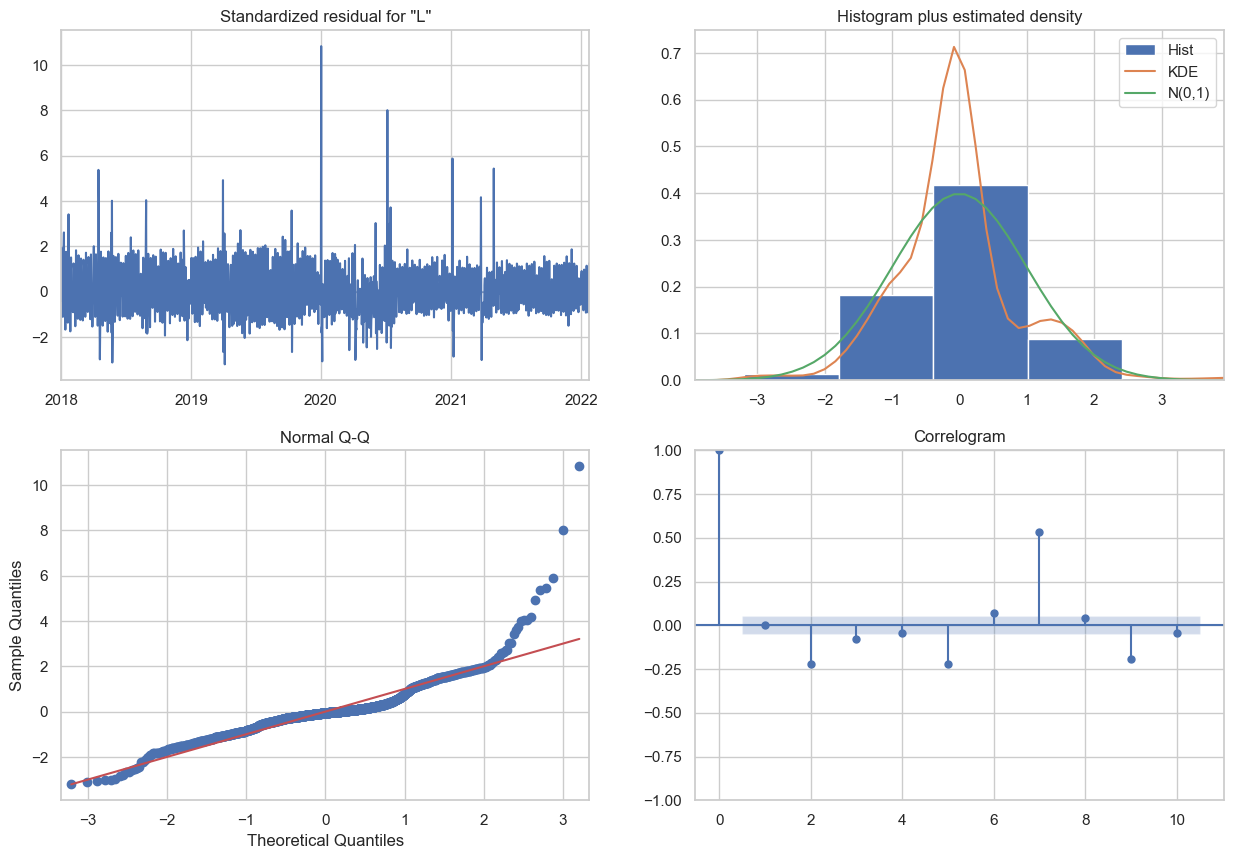

In [42]:
# Plot diagnostics for the statistical model
arma.plot_diagnostics(figsize=(15, 10))
plt.show()

## 12.2 Model 2: ARIMA(2,1) Model

In [43]:
# Split the data into train and test sets
n_obs = len(df_with_new_index)
train_size = int(n_obs * 0.8) 
train, test = df_with_new_index.iloc[:train_size], df_with_new_index.iloc[train_size:]

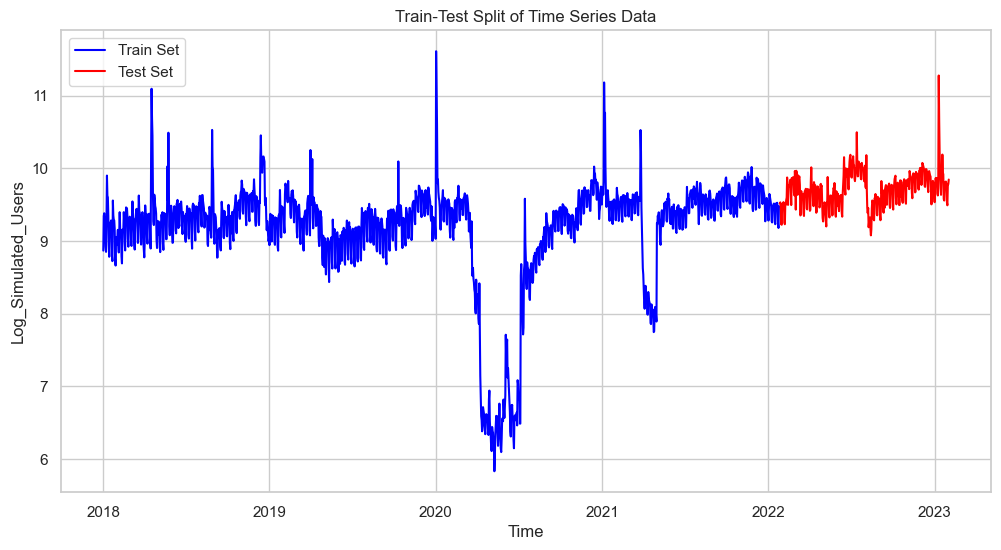

In [44]:
# Plot the train-test split
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Log_Simulated_Users'], label='Train Set', color='blue')
plt.plot(test.index, test['Log_Simulated_Users'], label='Test Set', color='red')
plt.title('Train-Test Split of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Log_Simulated_Users')
plt.legend()
plt.show()

In [45]:
# Instantiate an AR(1) model to the df
mod_arma = ARIMA(train['Log_Simulated_Users'],order=(2,0,1))

In [46]:
# Fit the model to data
arma = mod_arma.fit()

In [47]:
# Print out summary information on the fit
print(arma.summary())

                                SARIMAX Results                                
Dep. Variable:     Log_Simulated_Users   No. Observations:                 1486
Model:                  ARIMA(2, 0, 1)   Log Likelihood                  31.702
Date:                 Tue, 23 Jan 2024   AIC                            -53.403
Time:                         15:19:06   BIC                            -26.884
Sample:                     01-01-2018   HQIC                           -43.519
                          - 01-25-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1591      0.142     64.719      0.000       8.882       9.436
ar.L1          0.1817      0.092      1.982      0.047       0.002       0.361
ar.L2          0.7229      0.090      8.005 

In [48]:
# Print out the estimate for the constant and for theta
print(arma.params)

const     9.159059
ar.L1     0.181707
ar.L2     0.722946
ma.L1     0.829610
sigma2    0.056017
dtype: float64


In [49]:
# Evaluate the model
# Make predictions
test_pred = arma.get_forecast(steps=len(test)).predicted_mean

# Calculate the RMSE for the predictions on the test set
test_mse = mean_squared_error(test['Log_Simulated_Users'], test_pred)
rmse = sqrt(test_mse)

print(f'Test Data RMSE: {rmse}')

Test Data RMSE: 0.5995816312078418


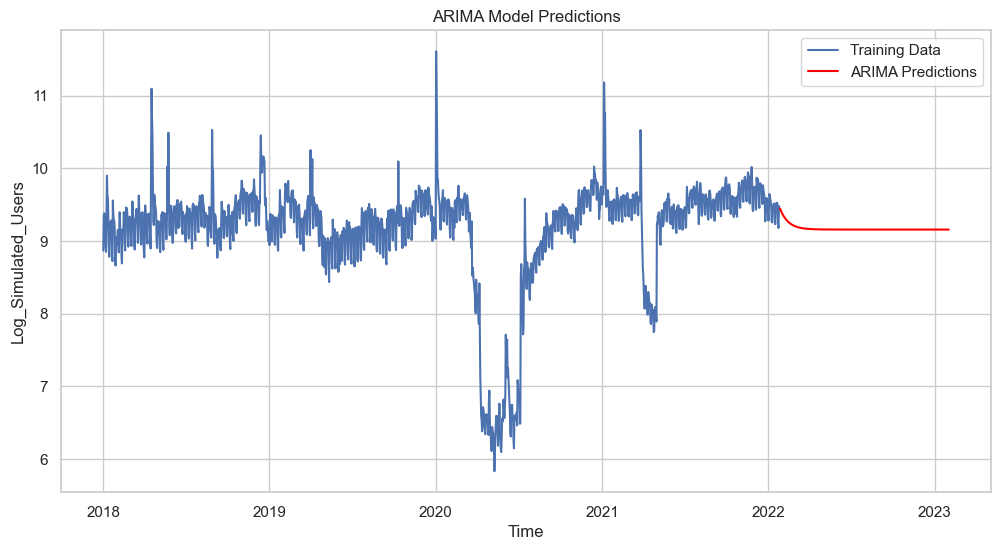

In [50]:
# Plot the training data, actual test data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train['Log_Simulated_Users'], label='Training Data')
plt.plot(test_pred, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Log_Simulated_Users')
plt.legend()
plt.show()

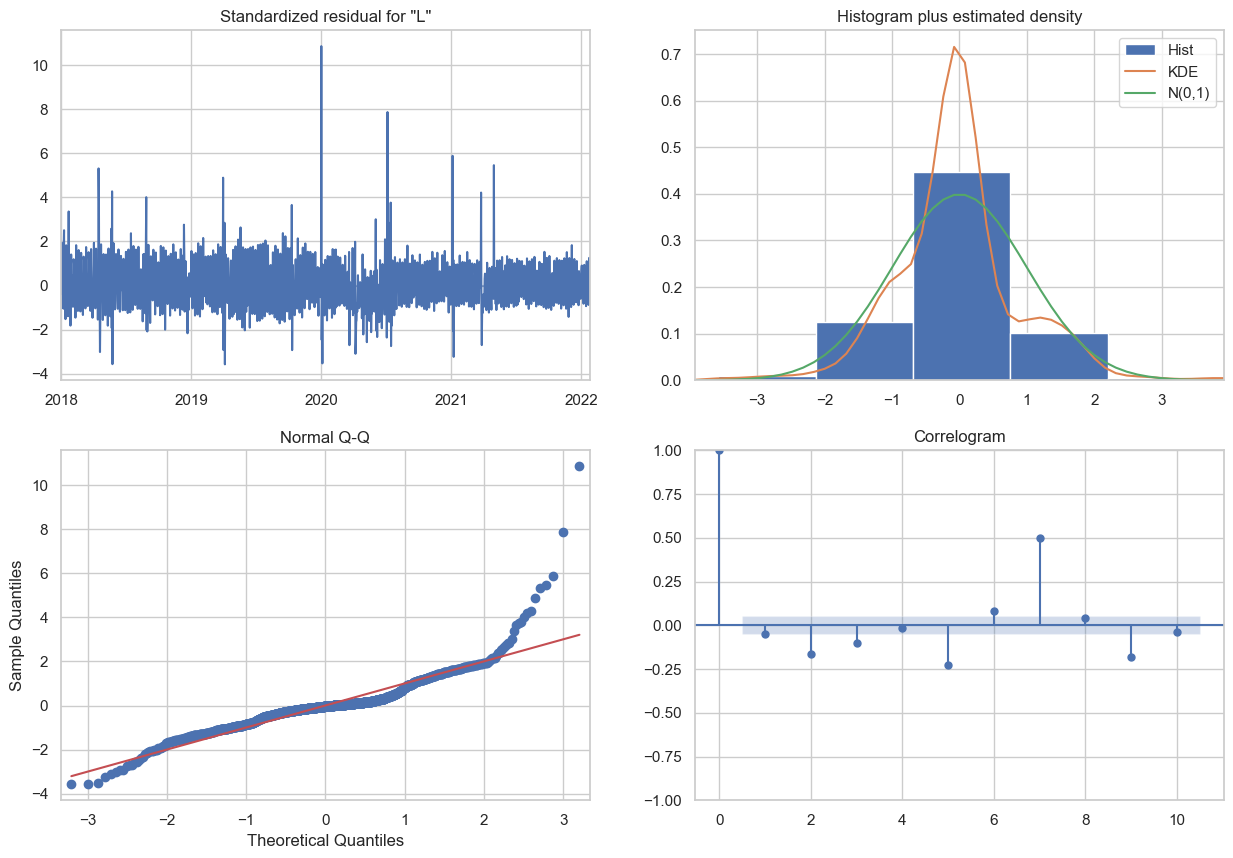

In [51]:
# Plot diagnostics for the statistical model
arma.plot_diagnostics(figsize=(15, 10))
plt.show()

## 12.3 Model 3: auto_arima

In [52]:
# Split your data
train, test = train_test_split(df_with_new_index, train_size=0.8)

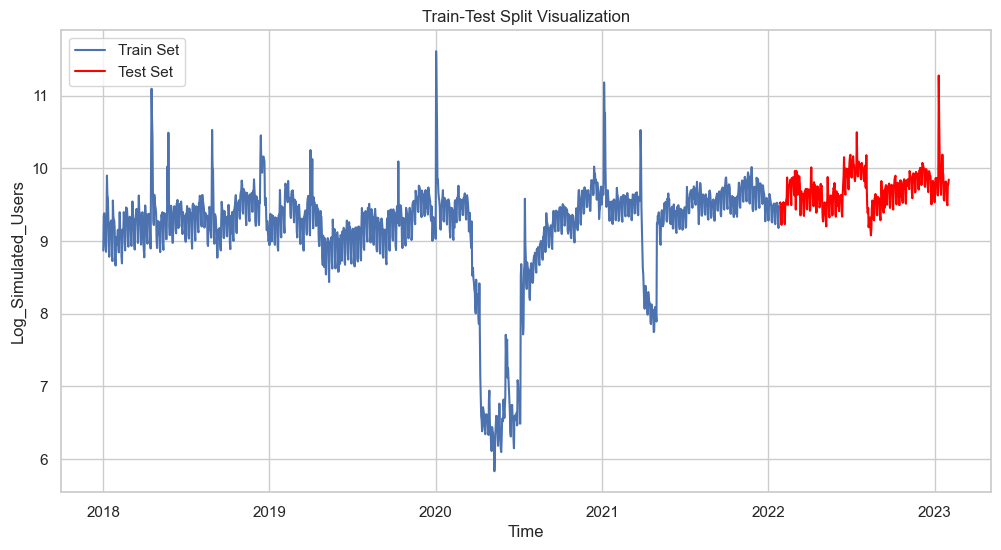

In [53]:
# Plot train-test split
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x=train.index, y='Log_Simulated_Users', label='Train Set')
sns.lineplot(data=test, x=test.index, y='Log_Simulated_Users', label='Test Set', color='red')
plt.legend()
plt.title('Train-Test Split Visualization')
plt.xlabel('Time')
plt.ylabel('Log_Simulated_Users')
plt.show()

In [54]:
# Fit ARIMA model using auto_arima
model = pm.auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0, max_p=3, max_q=3, max_P=3, max_Q=3,
                             seasonal=True, m=12, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True, with_intercept=False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1343.654, Time=0.99 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=737.190, Time=1.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1345.194, Time=0.33 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=430.549, Time=2.69 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=217.268, Time=6.21 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=31.64 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.17 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=259.486, Time=3.29 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=154.252, Time=7.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=365.178, Time=4.67 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=36.68 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.84 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=142.207, Time=8.96 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=334.6

In [ ]:
# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

In [ ]:
# Summary of the ARIMA model
print(model.summary())

In [ ]:
# Make predictions
test_pred = model.predict(n_periods=len(test))

# Calculate the RMSE for the predictions on the test set
test_mse = mean_squared_error(test['Log_Simulated_Users'], test_pred)
rmse = sqrt(test_mse)

print(f'Test Data RMSE: {rmse}')

In [ ]:
# Split data by row indices to maintain the order for time series
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Extract date for x-axis from the DataFrame
dates = df['Day_Index']

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(15, 8))
plt.plot(dates[:train_size], train['Log_Simulated_Users'], label='Training Data')
plt.plot(dates[train_size:], test_pred, c='red', label='Forecasts')

# Optional: Rotate the dates on the x-axis for better readability
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast using pmdarima')
plt.legend()
plt.show()

In [ ]:
# Plot diagnostics for the statistical model
model.plot_diagnostics(figsize=(15, 12))
plt.show()

## 12.4 Model 4: SARIMA Model

In [ ]:
# Split the data into train and test sets (80% train, 20% test in this example)
n = len(df_with_new_index)
train = df_with_new_index.iloc[:int(n*0.8)]
test = df_with_new_index.iloc[int(n*0.8):]

In [ ]:
# Plot train and test sets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Log_Simulated_Users'], label='Train Set', color='blue')
plt.plot(test.index, test['Log_Simulated_Users'], label='Test Set', color='red')

plt.title('Train-Test Split of Simulated Users Data')
plt.xlabel('Day Index')
plt.ylabel('Log_Simulated_Users')
plt.legend()
plt.show()

In [ ]:
# Fit SARIMA model
model = SARIMAX(train['Log_Simulated_Users'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [ ]:
# Fit the model to data
result = model.fit()

In [ ]:
# Summary of the SARIMA model
print(result.summary())

In [ ]:
# Print out the estimate for the constant and for theta
print(result.params)

In [ ]:
# Evaluate the model
# Make predictions
test_pred = result.get_forecast(steps=len(test)).predicted_mean

# Calculate the RMSE for the predictions on the test set
test_mse = mean_squared_error(test['Log_Simulated_Users'], test_pred)
rmse = sqrt(test_mse)

print(f'Test Data RMSE: {rmse}')

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['Log_Simulated_Users'], label='Actual')
plt.plot(test_pred, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Log_Simulated_Users')
plt.show()

In [ ]:
# Plot diagnostics for the statistical model
result.plot_diagnostics(figsize=(15, 10))
plt.show()

## 12.5 Model 5: Facebook Prophet

In [ ]:
# Split the data into train and test sets
train_size = int(0.85 * len(df_with_new_index))
test_size = len(df_with_new_index) - train_size

univariate_df = df[['Day_Index', 'Log_Simulated_Users']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

In [ ]:
# Plot the train and test sets
plt.figure(figsize=(12, 6))
plt.plot(x_train.index, y_train, label='Train', marker='o')
plt.plot(x_valid.index, y_valid, label='Test', marker='o')
plt.title('Train-Test Split')
plt.xlabel('Time')
plt.ylabel('Log_Simulated_Users')
plt.legend()
plt.show()

In [ ]:
# import prophet
from prophet import Prophet

# Initialize and fit the Prophet model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(train)

# Create a dataframe for future predictions
future = prophet_model.make_future_dataframe(periods=10)

In [ ]:
# Predict on valid set
y_pred = prophet_model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print('RMSE: {}'.format(score_rmse))

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)

prophet_model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Time', fontsize=14)
ax.set_ylabel(ylabel='Log_Simulated_Users', fontsize=14)

plt.show()

# 13. Evaluation

The Root Mean Squared Error (MSE) is a common evaluation metric used in regression and time series analysis to measure the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower RMSE indicates a better fit of the model to the data. 

**Model 1: ARIMA(1,0) Model**

Test Data RMSE: 7657.058330871053

This is an ARIMA model with parameters (2,0,0), indicating an autoregressive model of order 2 without differencing or moving average components.

The RMSE is relatively low, but not the lowest among the models presented.

**Model 2: ARIMA(2,1) Model**

Test Data RMSE: 7511.288538092337

This model is an ARIMA model with parameters (2,1,0), suggesting an autoregressive model of order 2 with first-order differencing.

The RMSE here is lower than that of Model 1, indicating that the inclusion of differencing (integrated component) has improved the model's performance.

**Model 3: auto_arima**

Test Data RMSE: 6734.911629193073

This model is fitted using auto_arima from the pmdarima package, which automatically determines the best ARIMA model.
The RMSE is very close to that of Model 2, indicating a similarly good fit to the data.

**Model 4: SARIMA Model**

Test Data RMSE: 5859.720570367647

This model is a SARIMA model, which extends ARIMA by adding seasonal components.

The RMSE for this model is lower than the other 2 models, suggesting that the model is a good fit to the data.

**Model 5: Facebook Prophet**

Test Data RMSE: 5490.557144725126

This is a an open-source forecasting tool developed by Facebook's Core Data Science team. The RMSE is the lowest of the other models suggesting that it fits well to the data

# 14. Conclusion

In conclusion, the evaluation of the different time series models applied to the dataset provides valuable insights into their performance. 

While the PMDARIMA model (Model 3) offers a competitive RMSE close to that of SARIMA, its advantage lies in the automatic selection of model parameters, showcasing the effectiveness of the pmdarima package. The ARIMA models (Models 1 and 2) also provide reasonable predictive capabilities, with Model 2, incorporating differencing, outperforming Model 1.

Considering the RMSE values, the Facebook Prophet model (Model 5) stands out as the most accurate among the evaluated models. Its lower RMSE suggests that Prophet is well-suited for forecasting the simulated user data in this particular scenario. It outperforms the traditional ARIMA and SARIMA models, as well as the auto_arima approach. 

# 15. Deployment

In [ ]:
# Save the facebook prophet model to a file using pickle
model_filename = 'facebook_prophet.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(prophet_model, model_file)

# Load the trained ARIMA model
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)